Extracting EDF parameters from /home/xmunder/universidad/DSP/lab4/r10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


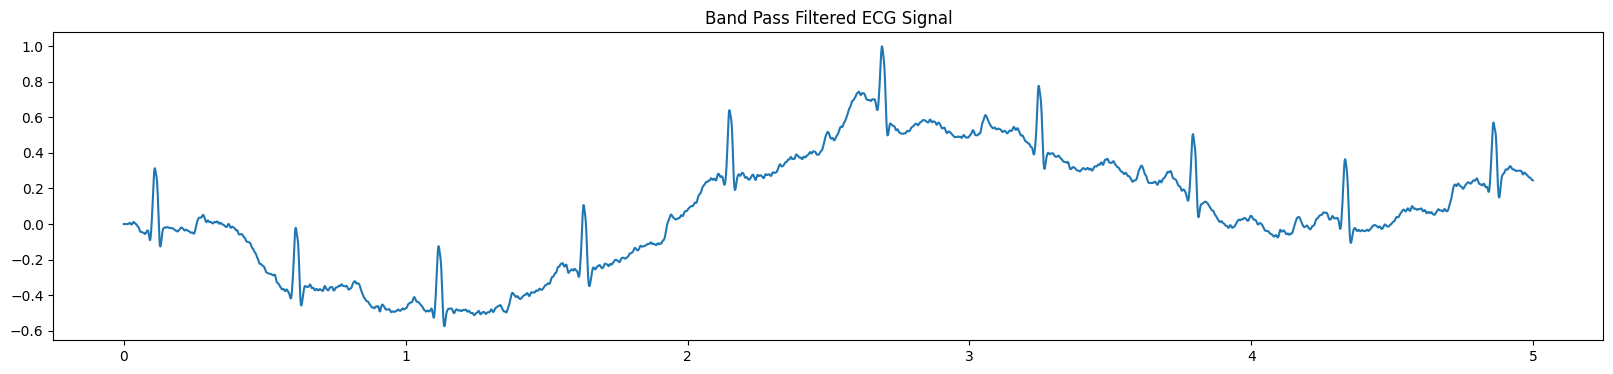

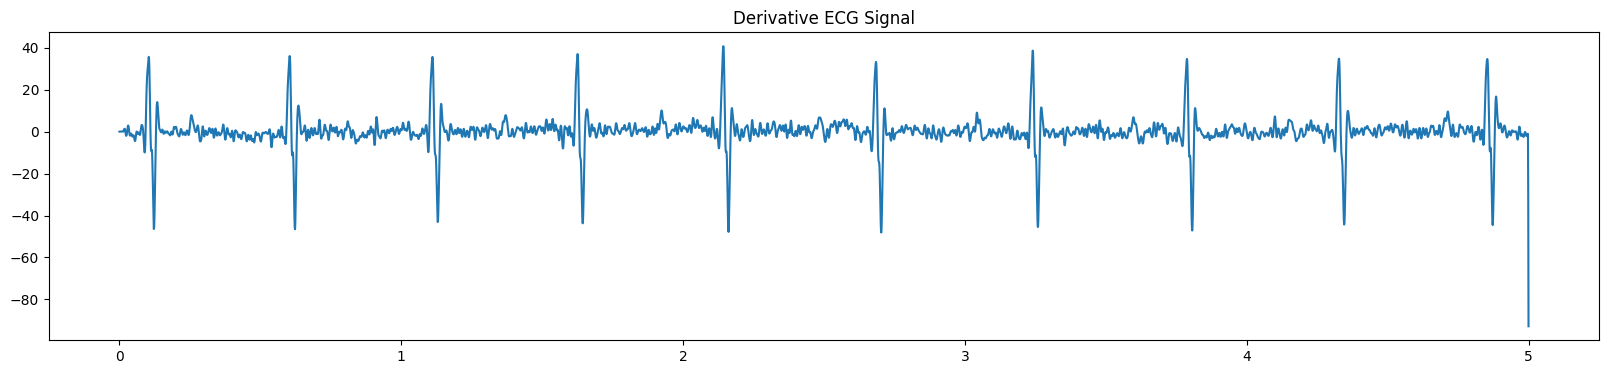

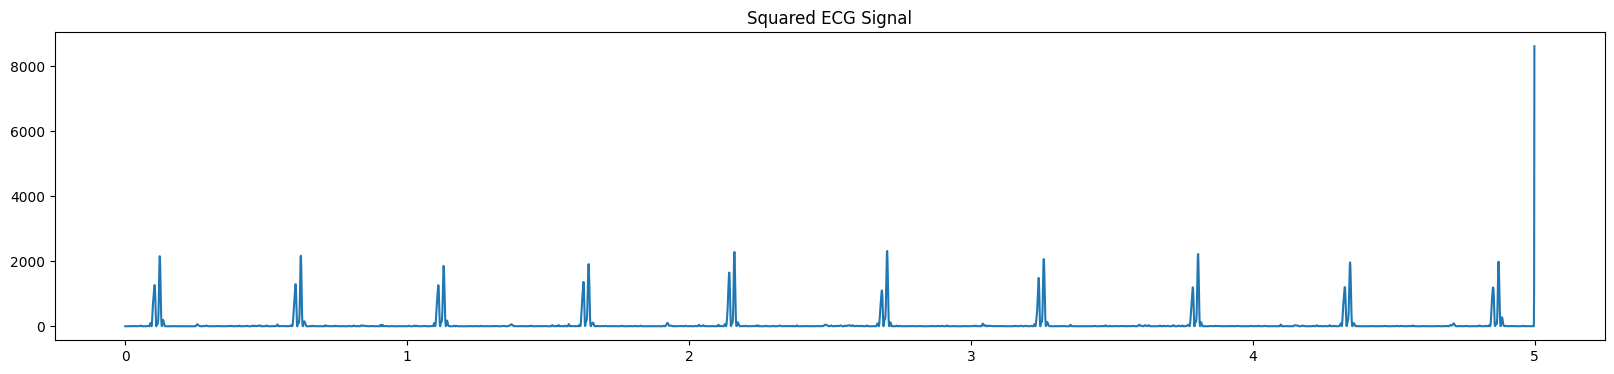

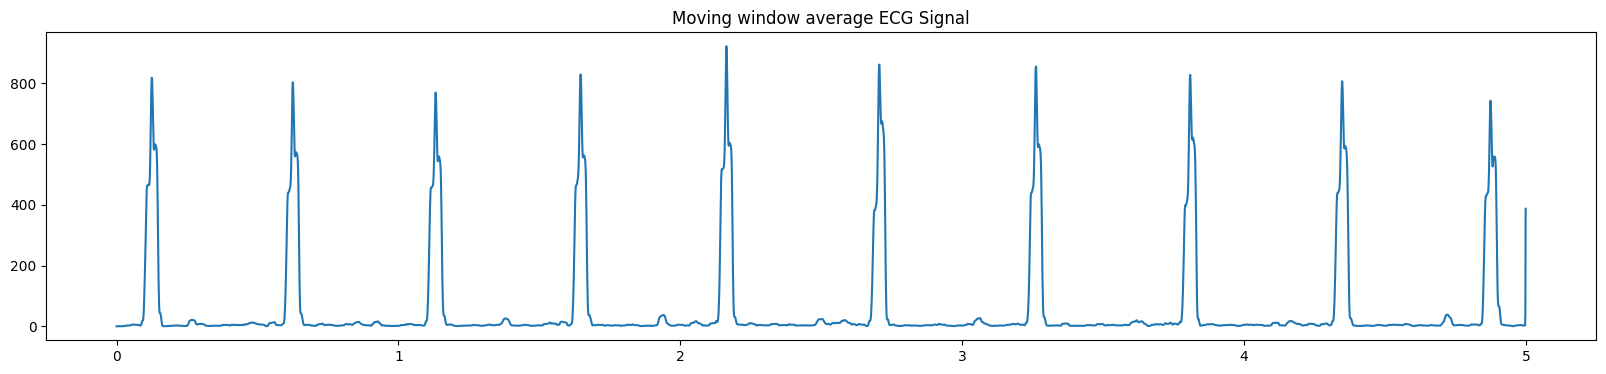

In [1]:
import mne
import numpy as np
import matplotlib.pyplot as plt


def low_pass_filter(signal):
    low_pass_signal = signal.copy()

    for t in range(len(signal)):
        curr = signal[t]

        if t >= 1:
            curr += 2 * low_pass_signal[t - 1]

        if t >= 2:
            curr -= low_pass_signal[t - 2]

        if t >= 6:
            curr -= 2 * signal[t - 6]

        if t >= 12:
            curr += signal[t - 12]

        low_pass_signal[t] = curr
    low_pass_signal = low_pass_signal / max(abs(low_pass_signal))

    return low_pass_signal


def high_pass_filter(signal):
    high_pass_signal = signal.copy()

    for t in range(len(signal)):
        curr = -1 * signal[t]

        if t >= 16:
            curr += 32 * signal[t - 16]

        if t >= 1:
            curr -= high_pass_signal[t - 1]

        if t >= 32:
            curr += signal[t - 32]

        high_pass_signal[t] = curr
    high_pass_signal = high_pass_signal / max(abs(high_pass_signal))

    return high_pass_signal


def band_pass_filter(signal):
    low_pass_signal = low_pass_filter(signal)
    band_pass_signal = high_pass_filter(low_pass_signal)
    return band_pass_signal


def derivate(signal):
    T = Ts
    derivate_signal = signal.copy()

    for t in range(len(signal)):
        curr = 0
        if t >= 2:
            curr -= signal[t - 2]

        if t >= 1:
            curr -= 2 * signal[t - 1]

        if t < (len(signal) - 1):
            curr += 2 * signal[t + 1]

        if t < (len(signal) - 2):
            curr += signal[t + 2]

        derivate_signal[t] = curr / (8 * T)

    return derivate_signal


def square(signal):
    squared_signal = signal.copy()
    for t in range(len(signal)):
        squared_signal[t] = signal[t] ** 2
    return squared_signal


def moving_window_integration(signal):
    WINDOW_SIZE = 0.025 * Fs
    moving_window_signal = signal.copy()
    for time in range(len(signal)):
        index = 0
        curr = 0
        while index < WINDOW_SIZE:
            if time < index:
                break
            curr += signal[time - index]
            index += 1

        moving_window_signal[time] = curr / index
    return moving_window_signal


Fs = 1000
Ts = 1 / Fs

# Ruta al archivo EDF
archivo_edf = "r10.edf"

# Cargar el archivo EDF
datos = mne.io.read_raw_edf(archivo_edf)

# Leer los datos
raw_data = np.array(datos.get_data())

# Vector de tiempo
t = np.linspace(0, (len(raw_data[0]) * Ts), len(raw_data[0]))

window_size = 5000
channel = 0

band_pass_signal = band_pass_filter(raw_data[channel][:window_size].copy())
derivative_signal = derivate(band_pass_signal.copy())
square_signal = square(derivative_signal.copy())
moving_window_avg_signal = moving_window_integration(square_signal.copy())

plt.figure(figsize=(20, 4))
plt.plot(t[:window_size], raw_data[channel][:window_size])
plt.title("Raw ECG Signal")

plt.figure(figsize=(20, 4))
plt.plot(t[:window_size], band_pass_signal)
plt.title("Band Pass Filtered ECG Signal")

plt.figure(figsize=(20, 4))
plt.plot(t[:window_size], derivative_signal)
plt.title("Derivative ECG Signal")

plt.figure(figsize=(20, 4))
plt.plot(t[:window_size], square_signal)
plt.title("Squared ECG Signal")

plt.figure(figsize=(20, 4))
plt.plot(t[:window_size], moving_window_avg_signal)
plt.title("Moving window average ECG Signal")

plt.show()

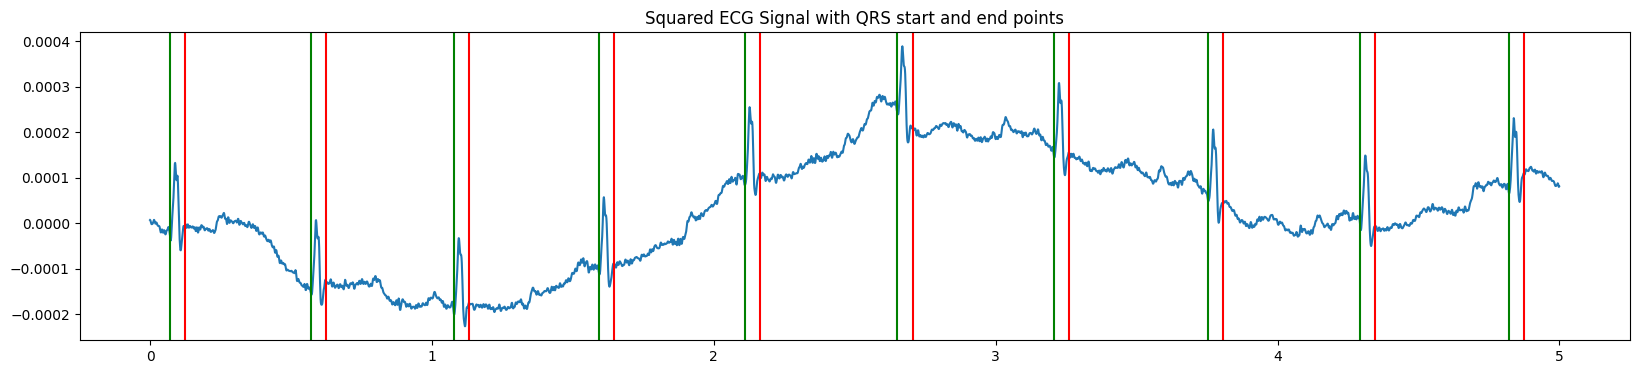

In [2]:
def detect_qrs(signal, threshold_ratio, delay):
    threshold = np.max(signal) * threshold_ratio
    qrs_start = []
    qrs_end = []

    for i in range(1, len(signal)):
        if signal[i] > threshold and signal[i - 1] <= threshold:
            qrs_start.append(max(0, i - delay - 5))  # Apply delay
        elif signal[i] <= threshold and signal[i - 1] > threshold:
            qrs_end.append(i - delay)
    return qrs_start, qrs_end


qrs_start, qrs_end = detect_qrs(moving_window_avg_signal, 0.15, 25)

# Plotting the square signal with QRS start and end points
plt.figure(figsize=(20, 4))
plt.plot(t[:5000], raw_data[channel][:5000])
plt.title("Squared ECG Signal with QRS start and end points")
for start, end in zip(qrs_start, qrs_end):
    plt.axvline(x=t[start], color="g")  # QRS start
    plt.axvline(x=t[end], color="r")  # QRS end
plt.show()

#### **Datos ventaneados**

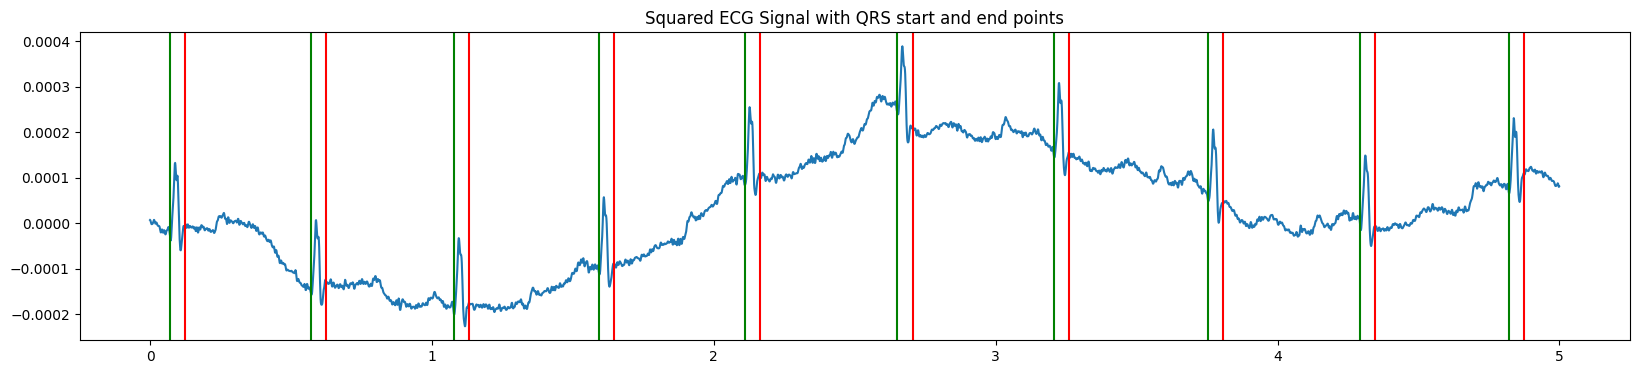

[0.055, 0.054, 0.055, 0.054, 0.054, 0.054, 0.053, 0.054, 0.054, 0.055]


[0.049, 0.05, 0.048, 0.048, 0.049, 0.049, 0.049, 0.051, 0.049, 0.047]


[0.051, 0.053, 0.054, 0.052, 0.052, 0.052, 0.053, 0.051, 0.052, 0.053, 0.052]


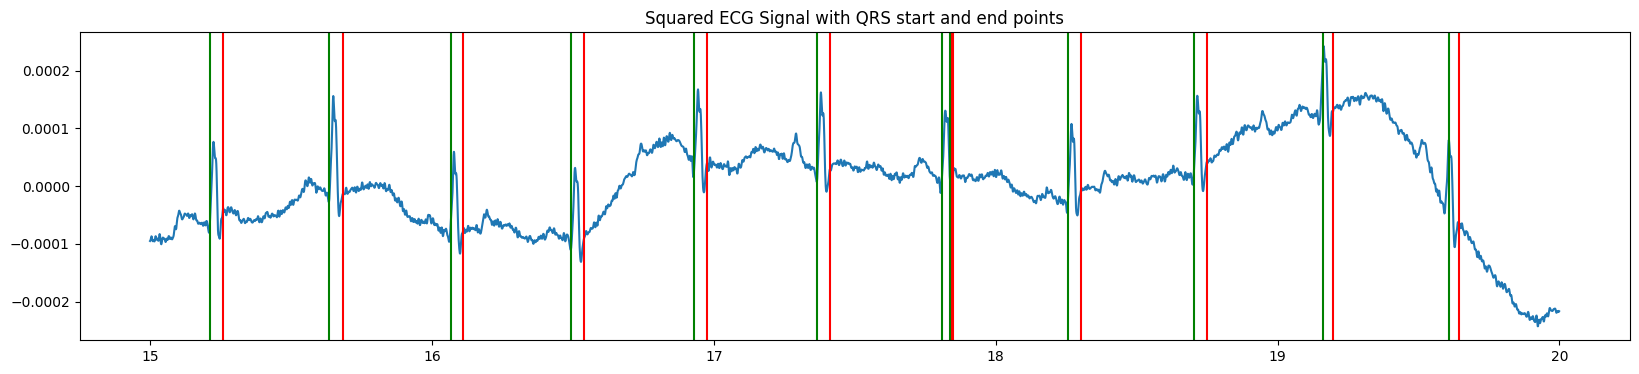

[0.047, 0.049, 0.044, 0.046, 0.046, 0.046, 0.031, 0.044, 0.046, 0.033, 0.034]


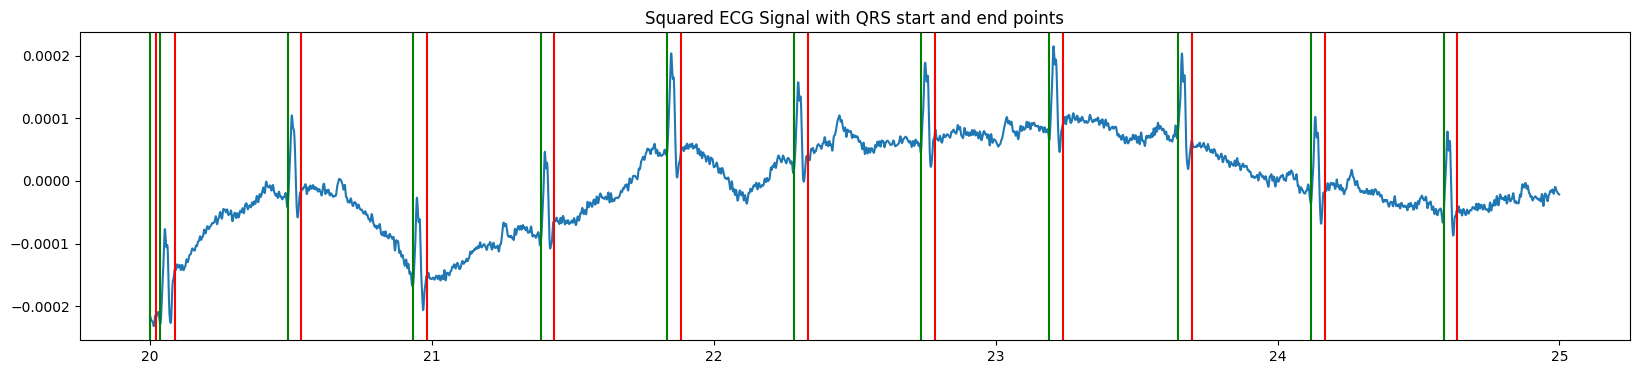

[0.05, 0.049, 0.05, 0.048, 0.051, 0.048, 0.049, 0.05, 0.047, 0.049]


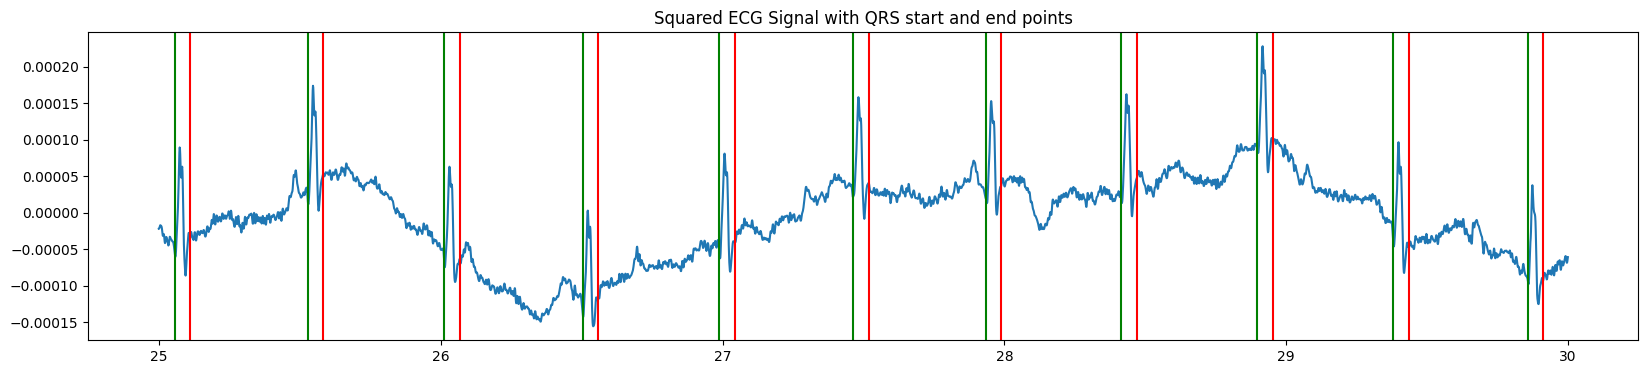

[0.055, 0.055, 0.054, 0.054, 0.055, 0.054, 0.054, 0.055, 0.055, 0.056, 0.053]


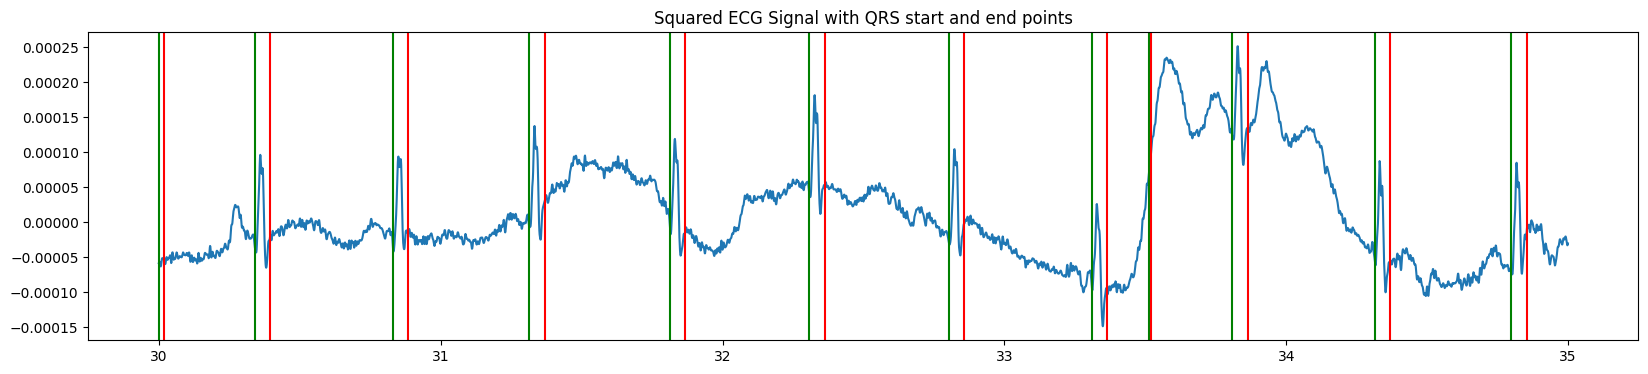

[0.055, 0.053, 0.056, 0.055, 0.055, 0.053, 0.054, 0.055, 0.055]


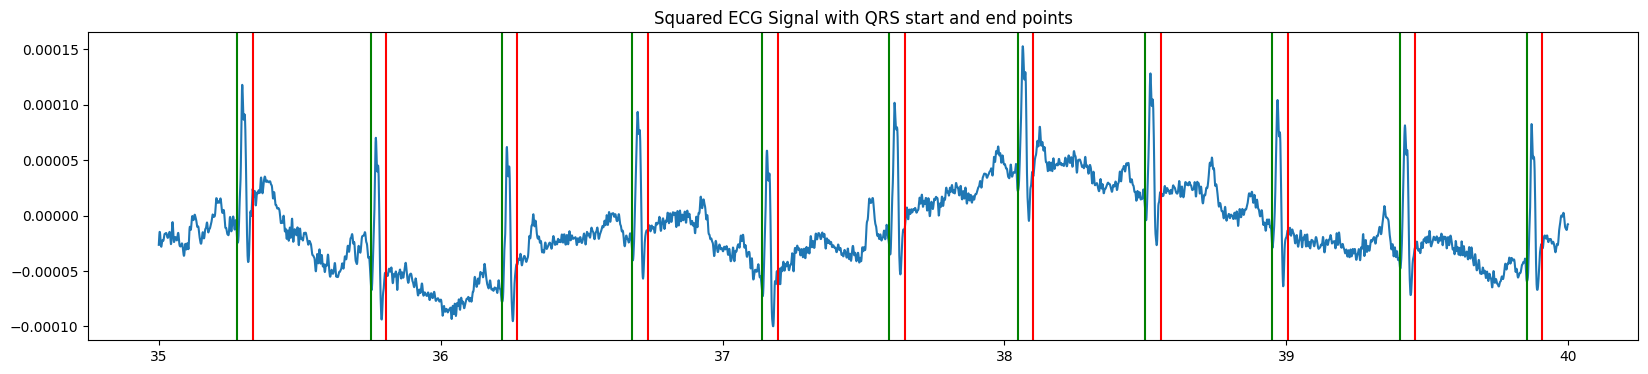

[0.055, 0.055, 0.055, 0.055, 0.056, 0.055, 0.055, 0.055, 0.055, 0.054]


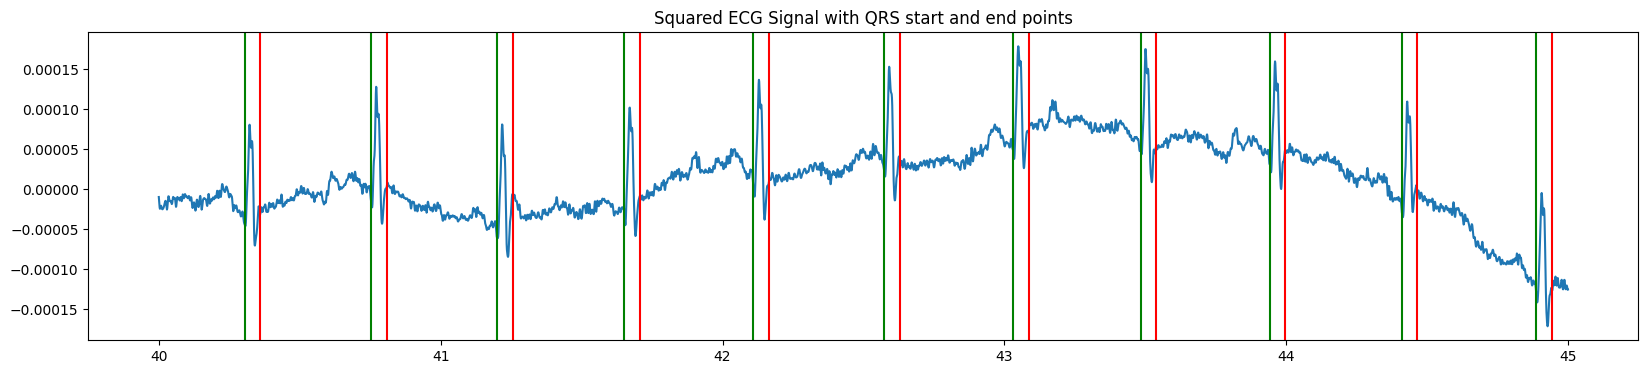

[0.053, 0.056, 0.057, 0.056, 0.057, 0.055, 0.056, 0.055, 0.055, 0.054, 0.056]


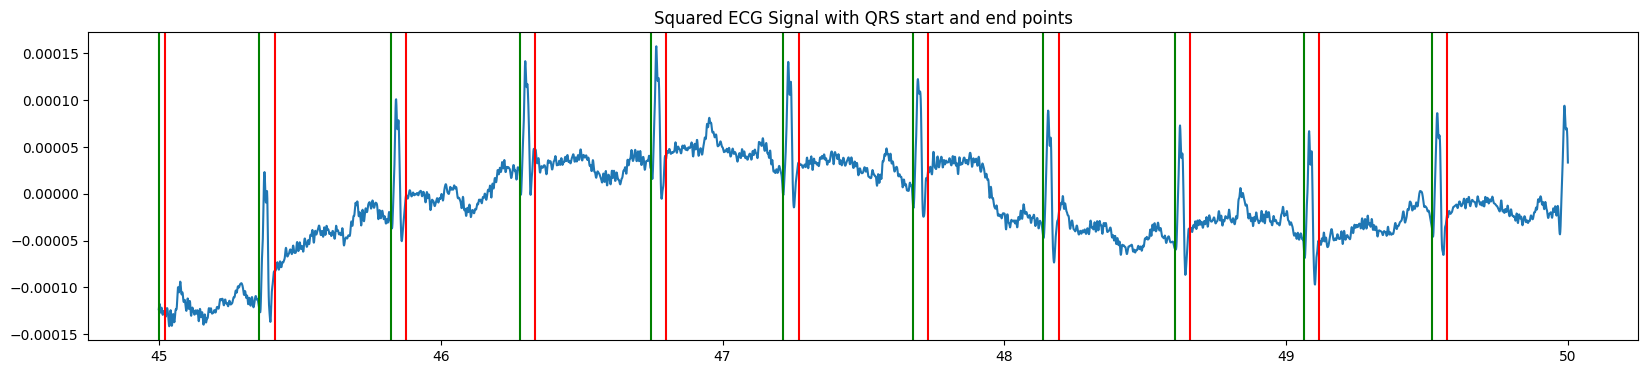

[0.055, 0.054, 0.054, 0.054, 0.055, 0.056, 0.056, 0.054, 0.054, 0.054]


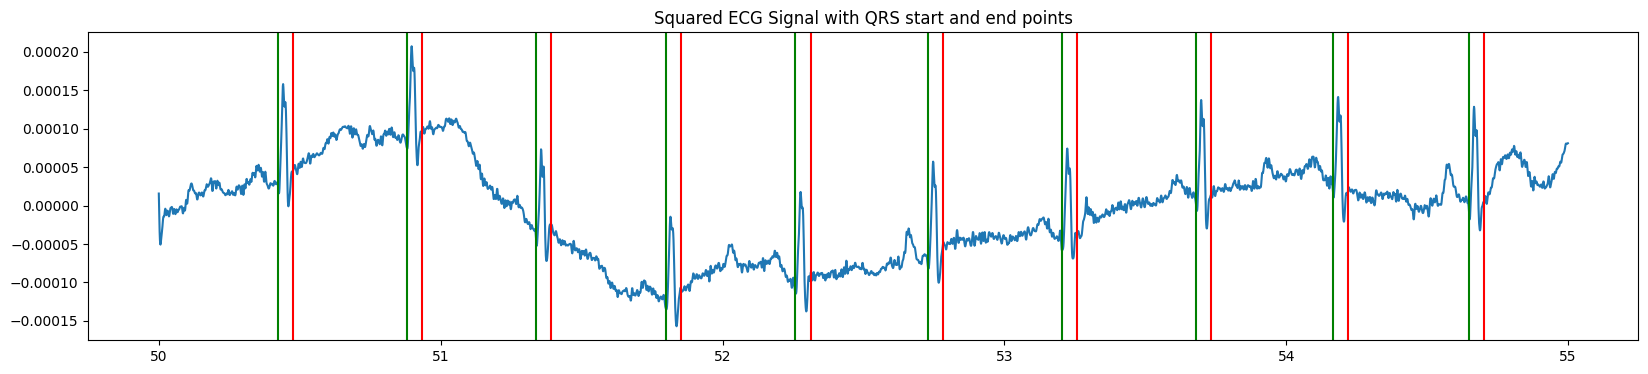

[0.054, 0.054, 0.053, 0.054, 0.055, 0.054, 0.055, 0.054, 0.054, 0.055]


[0.054, 0.054, 0.054, 0.054, 0.054, 0.054, 0.054, 0.055, 0.055, 0.054]


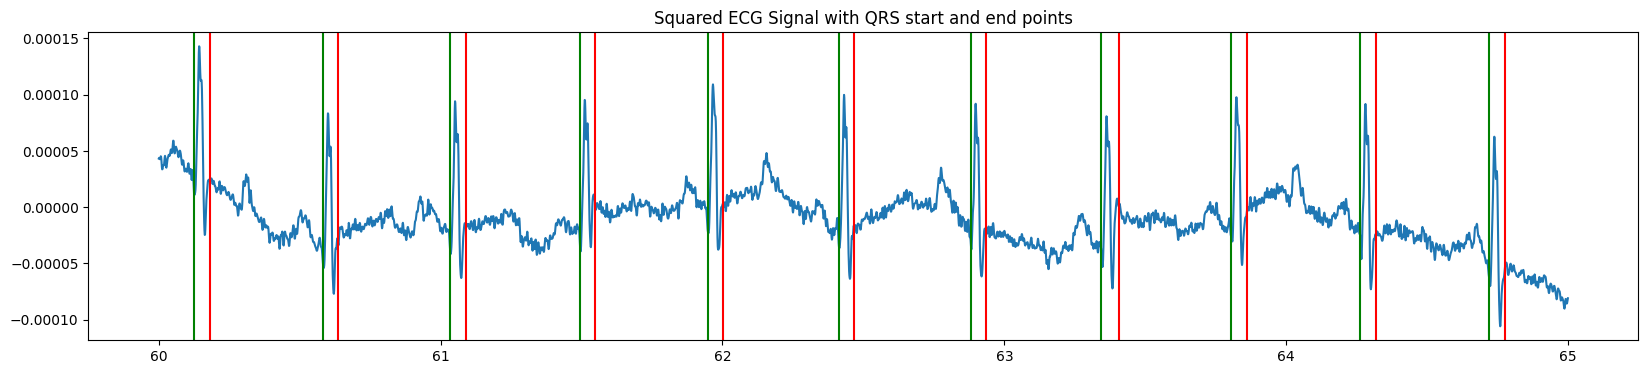

[0.055, 0.055, 0.055, 0.054, 0.055, 0.054, 0.053, 0.062, 0.054, 0.055, 0.055]


[0.055, 0.054, 0.053, 0.056, 0.054, 0.054, 0.056, 0.054, 0.054, 0.054]


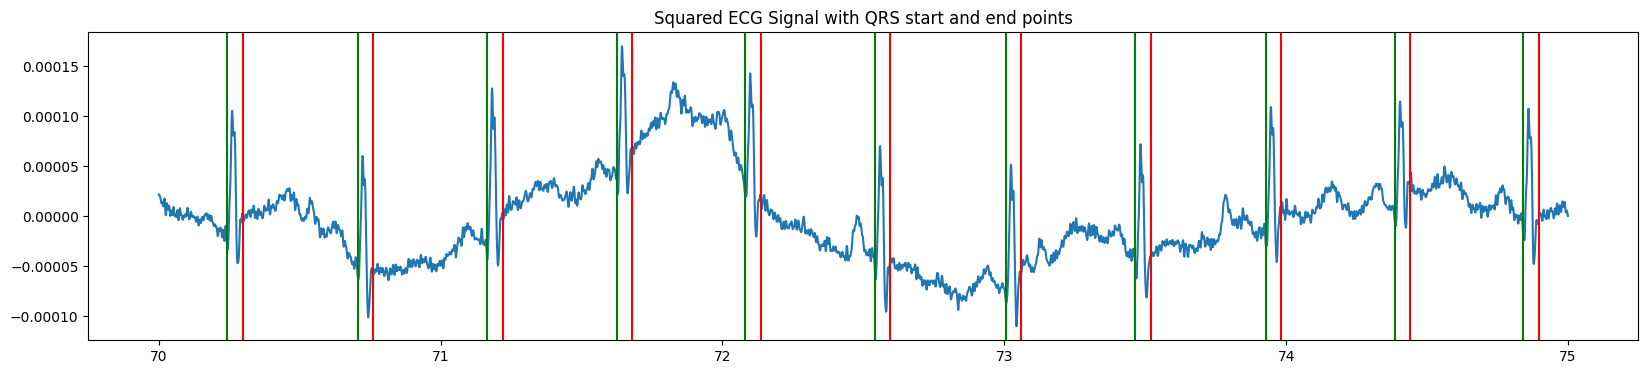

[0.055, 0.053, 0.057, 0.054, 0.054, 0.054, 0.055, 0.054, 0.055, 0.053]


[0.054, 0.052, 0.054, 0.053, 0.055, 0.055, 0.054, 0.053, 0.055, 0.054, 0.055]


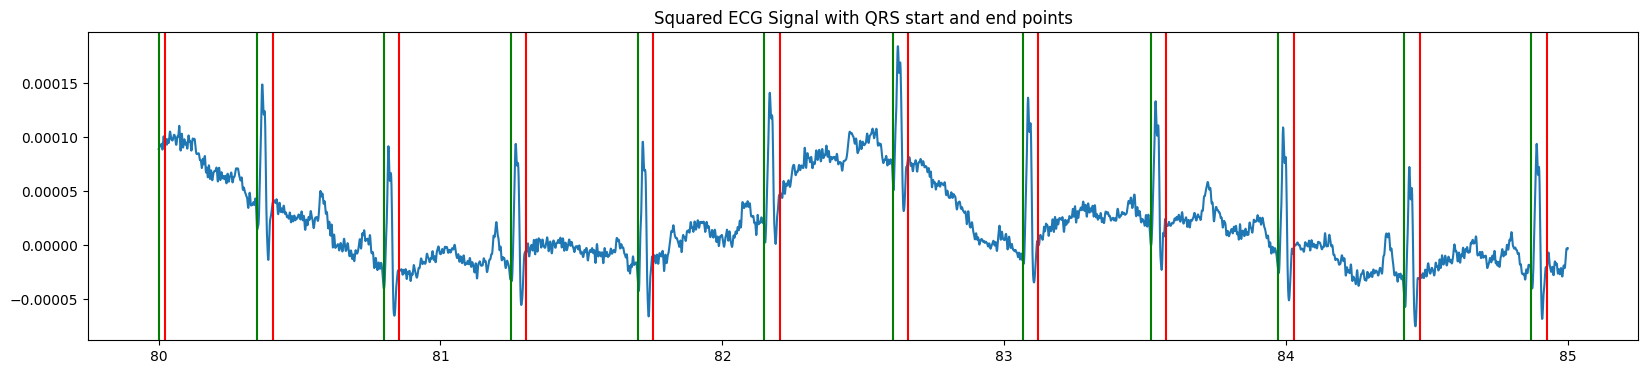

[0.055, 0.054, 0.054, 0.054, 0.054, 0.055, 0.055, 0.054, 0.054, 0.054]


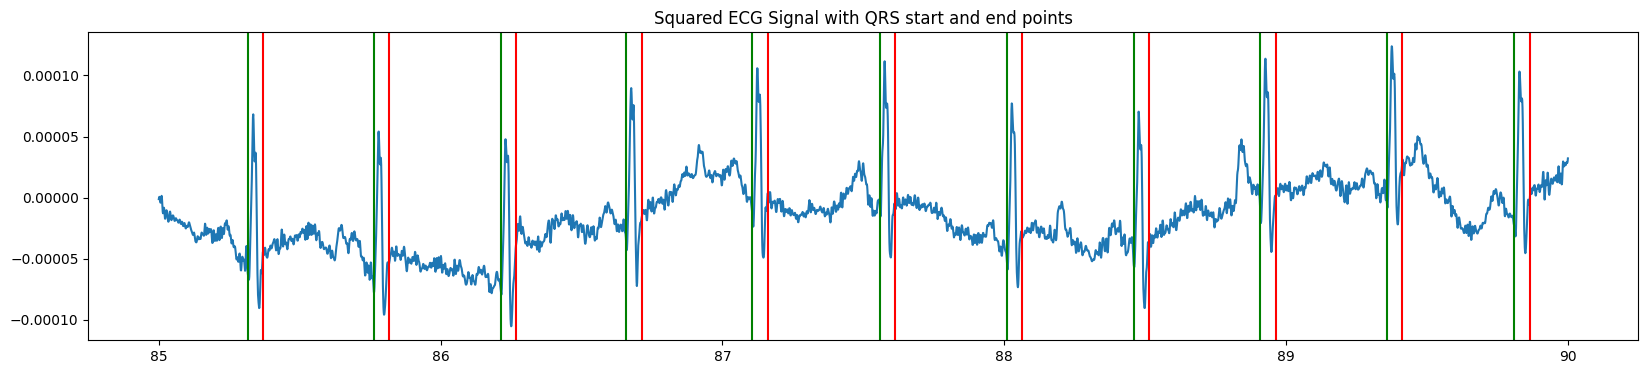

[0.055, 0.053, 0.055, 0.055, 0.055, 0.054, 0.054, 0.055, 0.055, 0.055]


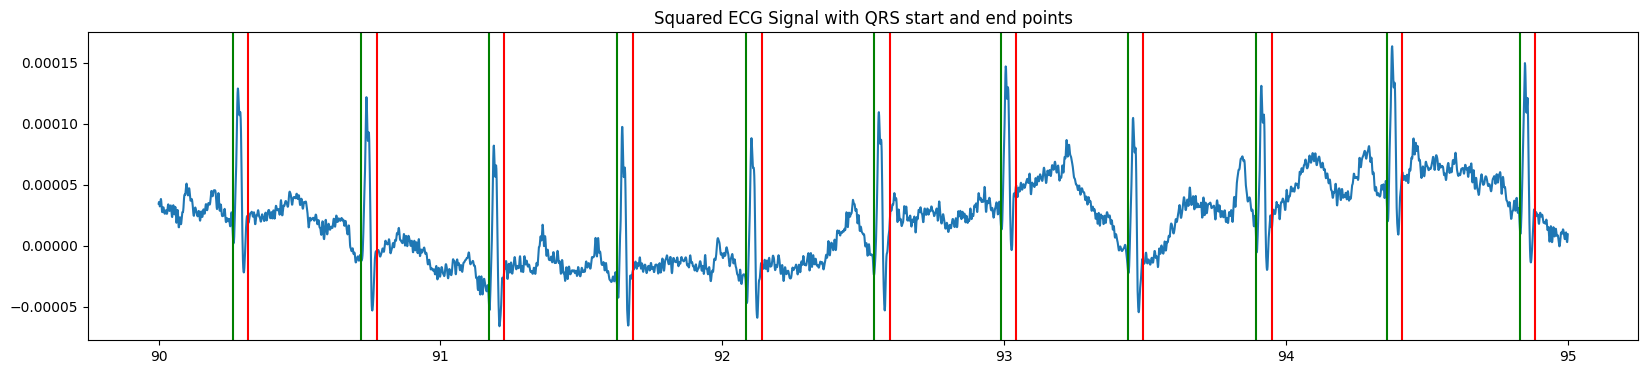

[0.055, 0.056, 0.054, 0.054, 0.055, 0.056, 0.055, 0.055, 0.055, 0.056]


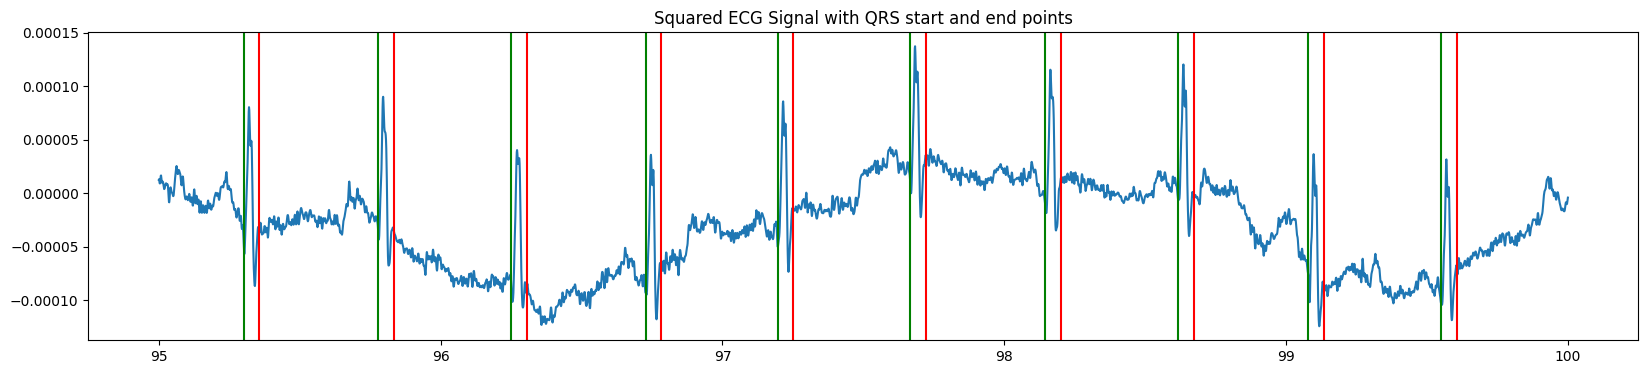

[0.056, 0.055, 0.056, 0.054, 0.055, 0.055, 0.055, 0.055, 0.055]


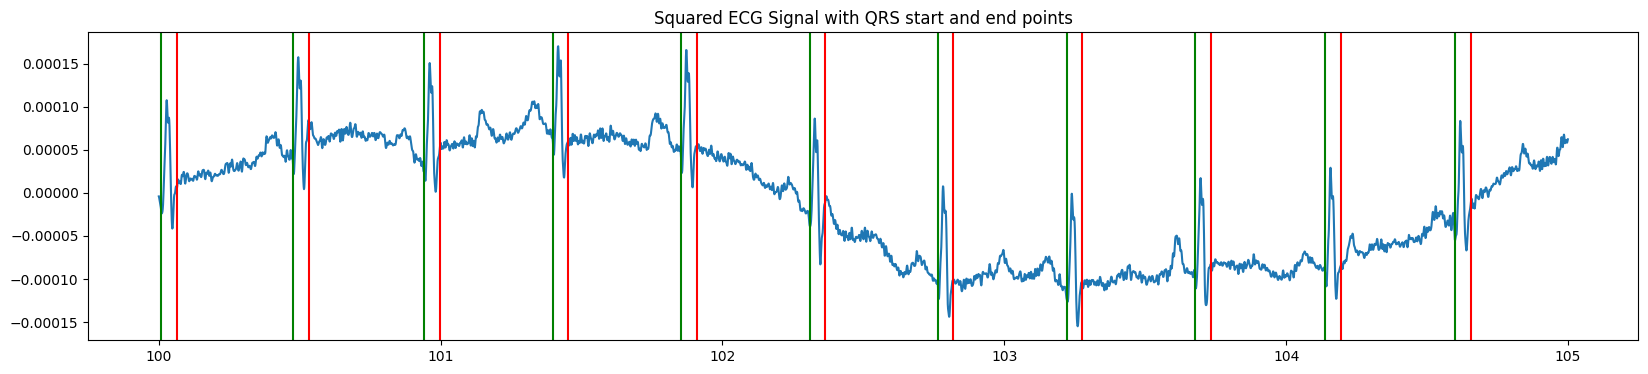

[0.056, 0.058, 0.055, 0.054, 0.057, 0.056, 0.054, 0.055, 0.055, 0.055, 0.055]


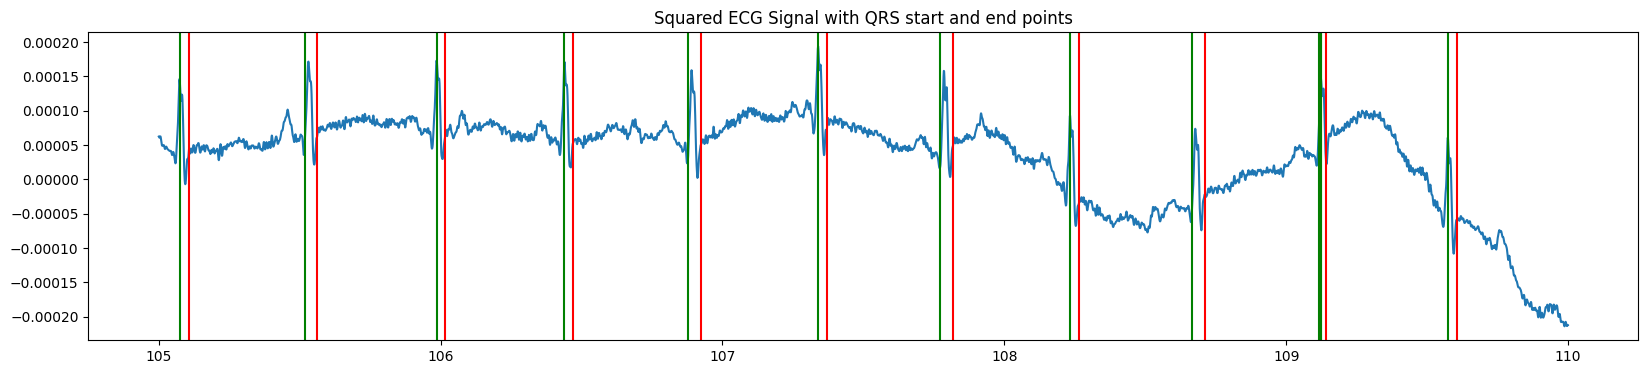

[0.032, 0.044, 0.031, 0.034, 0.045, 0.032, 0.047, 0.033, 0.045, 0.033]


[0.033, 0.046, 0.047, 0.046, 0.047, 0.045, 0.046, 0.045, 0.047, 0.044]


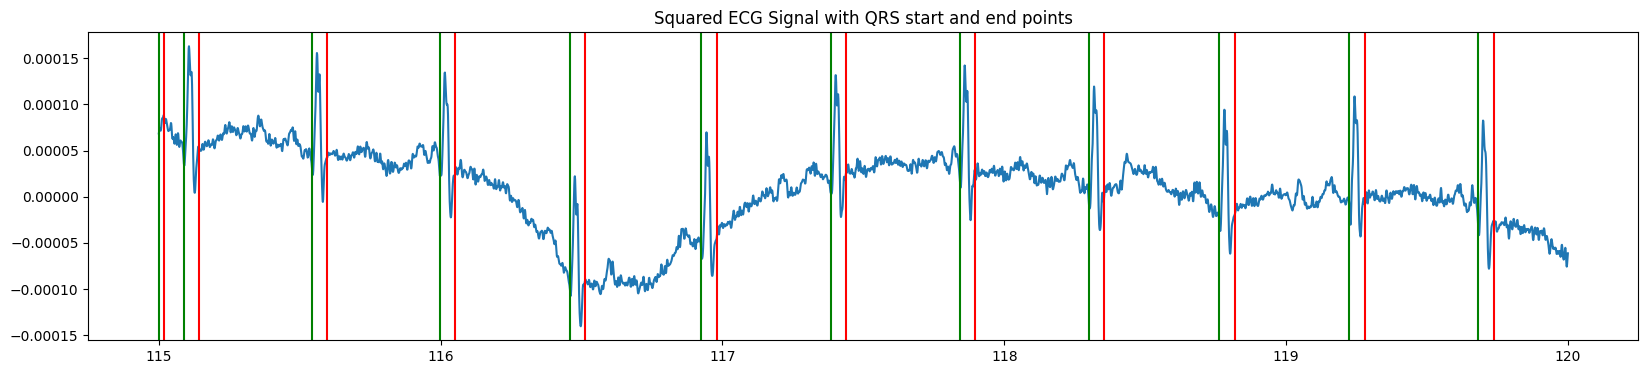

[0.055, 0.055, 0.054, 0.055, 0.055, 0.055, 0.055, 0.055, 0.055, 0.055, 0.056]


[0.055, 0.056, 0.055, 0.055, 0.056, 0.055, 0.055, 0.055, 0.055, 0.054, 0.054]


[0.056, 0.055, 0.054, 0.055, 0.054, 0.055, 0.055, 0.056, 0.057, 0.055]


[0.056, 0.056, 0.055, 0.055, 0.054, 0.055, 0.056, 0.054, 0.054, 0.054, 0.055]


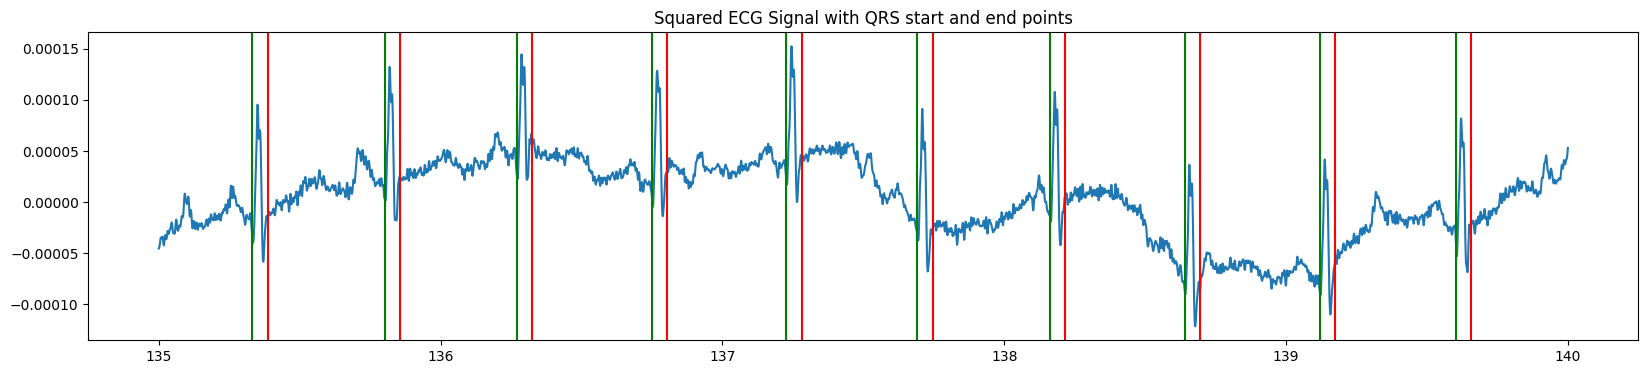

[0.055, 0.054, 0.055, 0.055, 0.055, 0.055, 0.055, 0.054, 0.054]


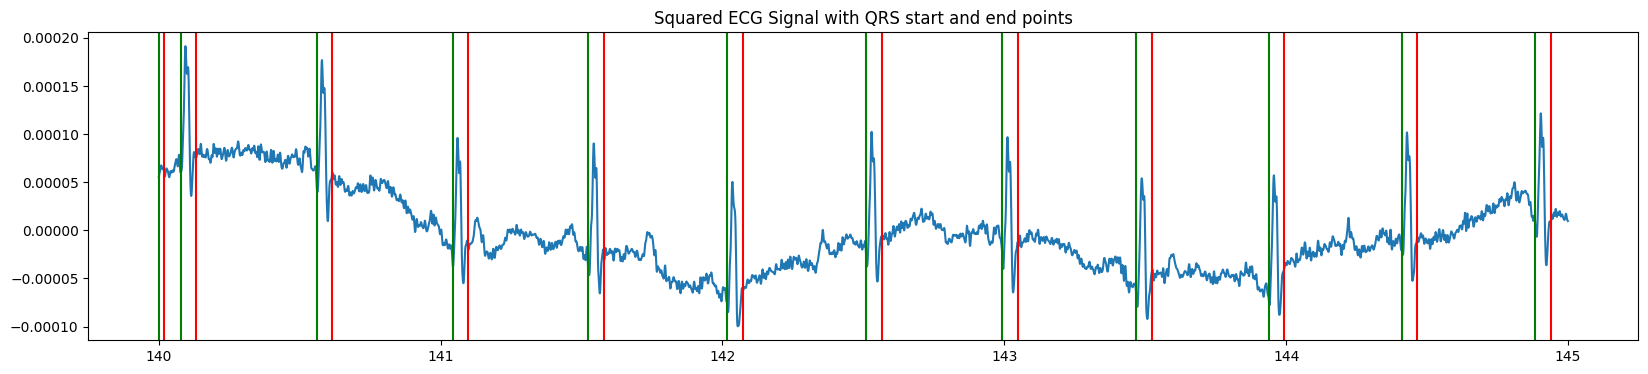

[0.055, 0.056, 0.054, 0.055, 0.055, 0.055, 0.055, 0.055, 0.055, 0.055]


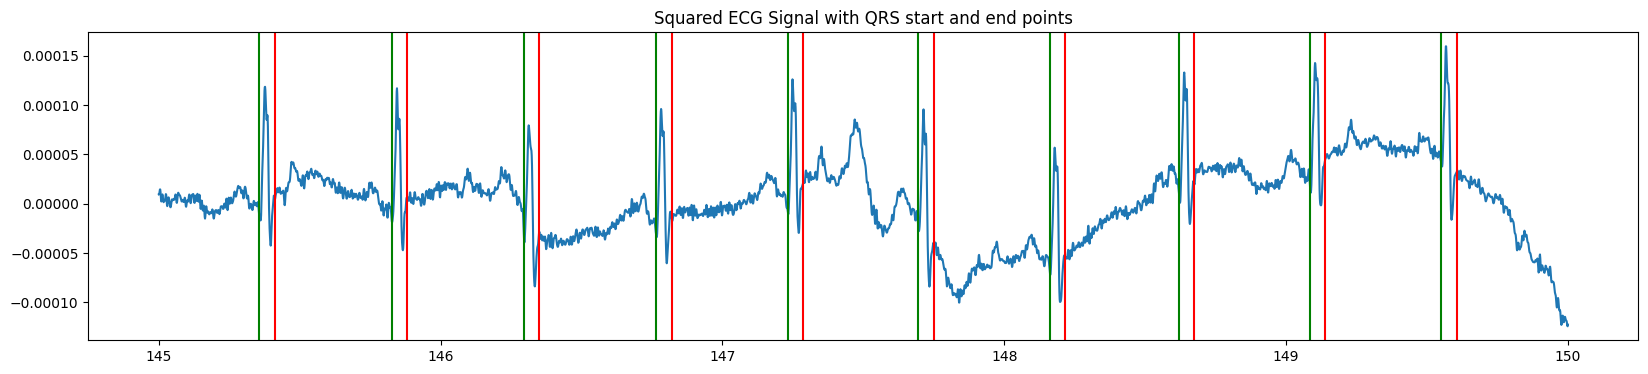

[0.056, 0.054, 0.055, 0.055, 0.055, 0.054, 0.054, 0.055, 0.055, 0.054]


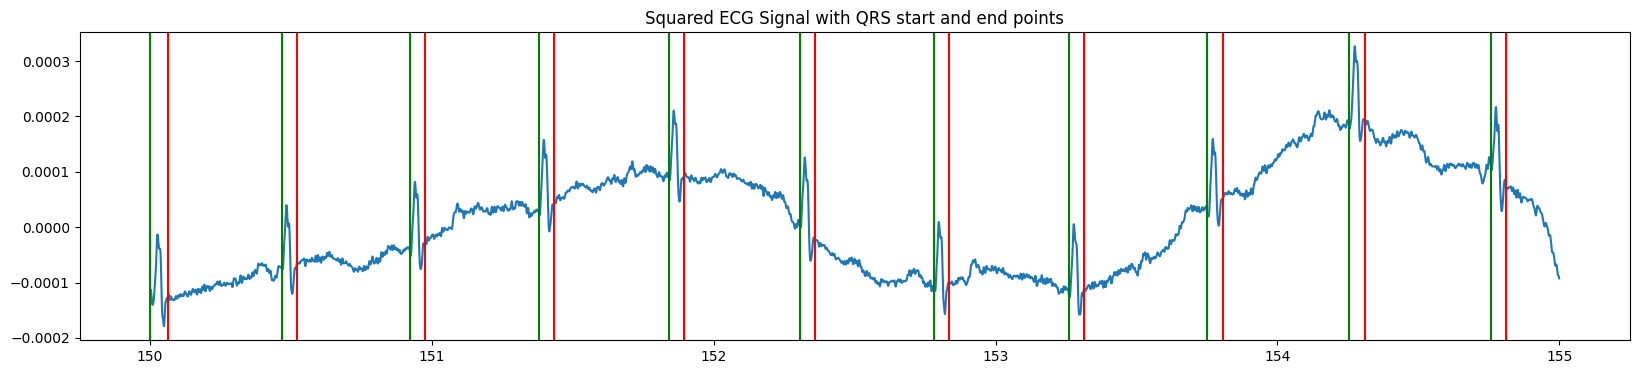

[0.064, 0.053, 0.055, 0.055, 0.054, 0.055, 0.054, 0.054, 0.055, 0.056, 0.054]


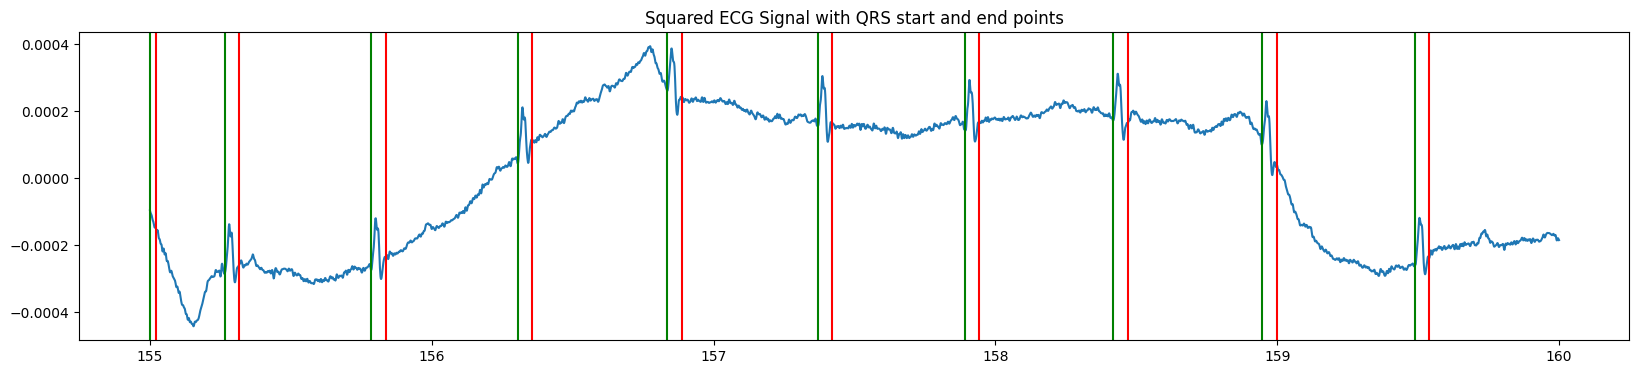

[0.051, 0.051, 0.052, 0.051, 0.052, 0.052, 0.051, 0.051, 0.051]


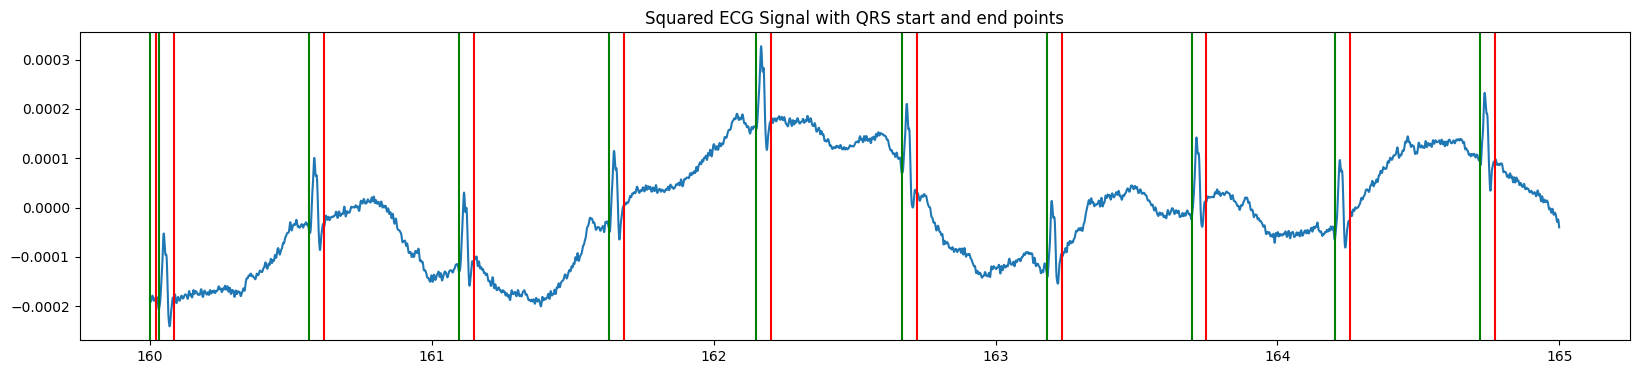

[0.053, 0.053, 0.054, 0.055, 0.054, 0.052, 0.053, 0.052, 0.053]


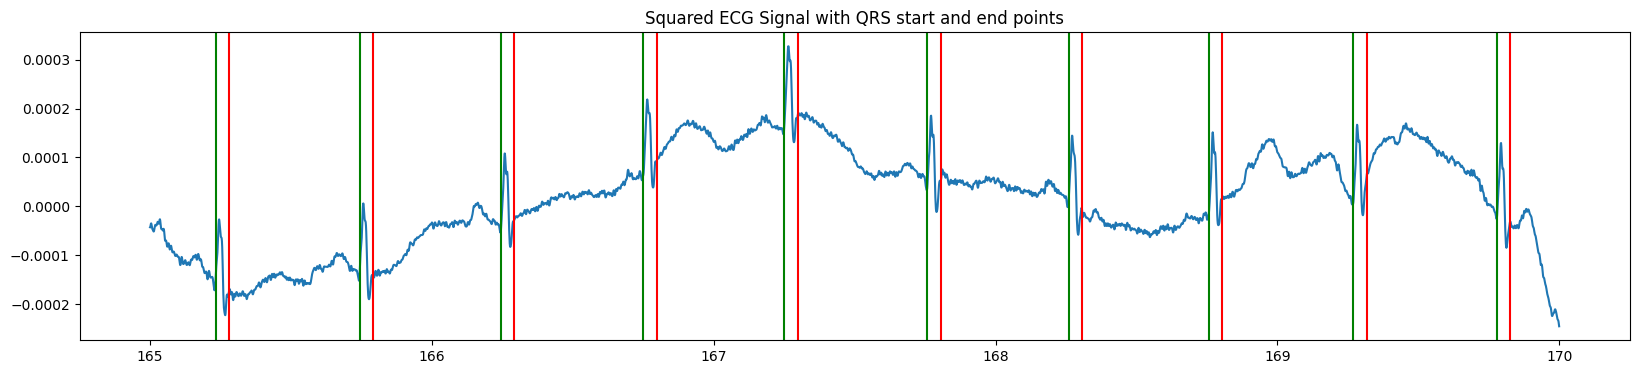

[0.044, 0.046, 0.047, 0.048, 0.05, 0.047, 0.046, 0.048, 0.047, 0.046]


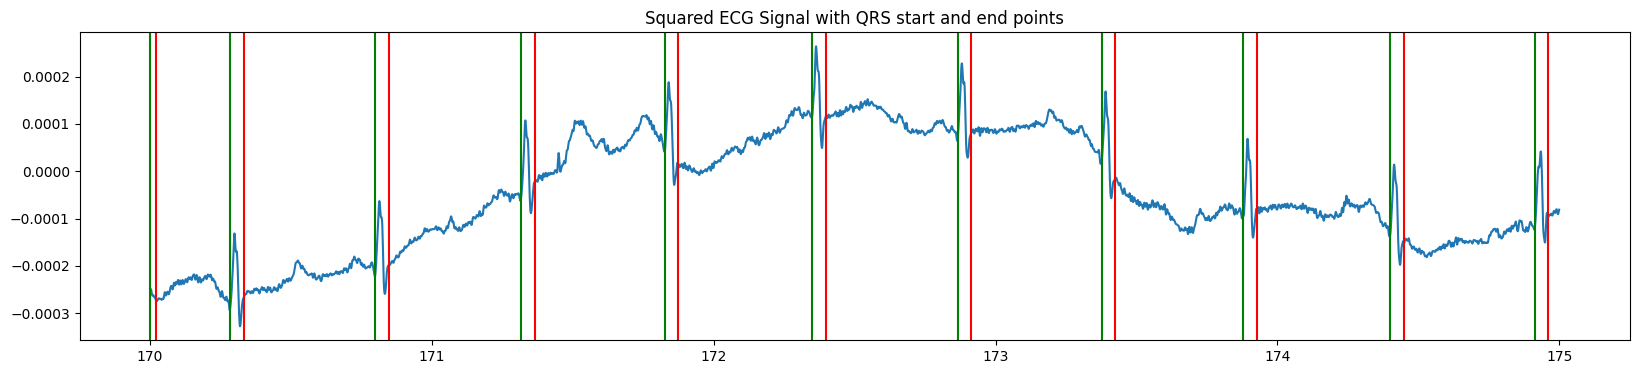

[0.049, 0.049, 0.049, 0.048, 0.048, 0.049, 0.048, 0.049, 0.048, 0.048]


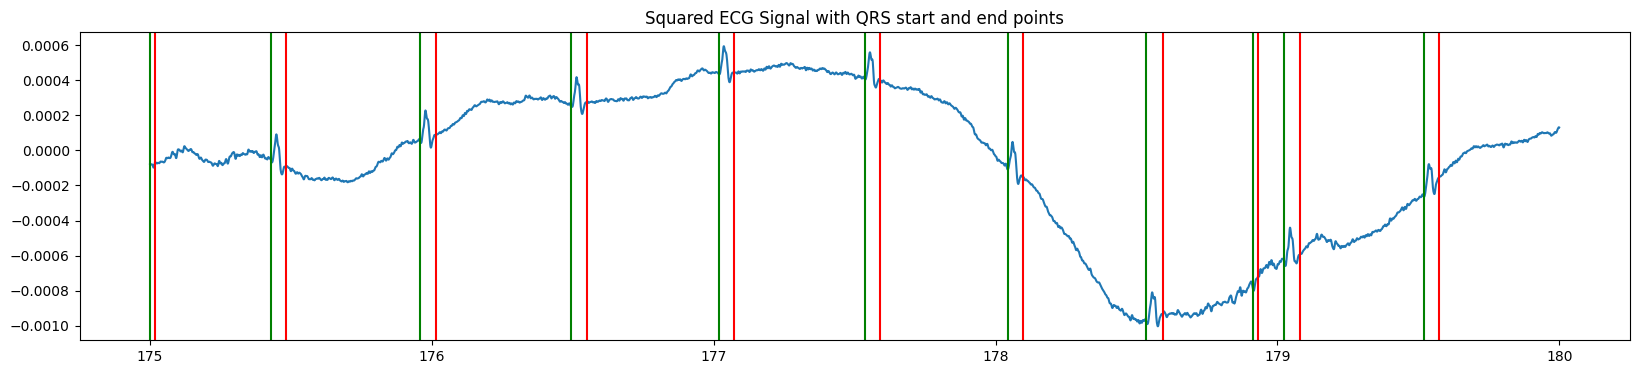

[0.053, 0.056, 0.054, 0.054, 0.053, 0.054, 0.057, 0.056, 0.056]


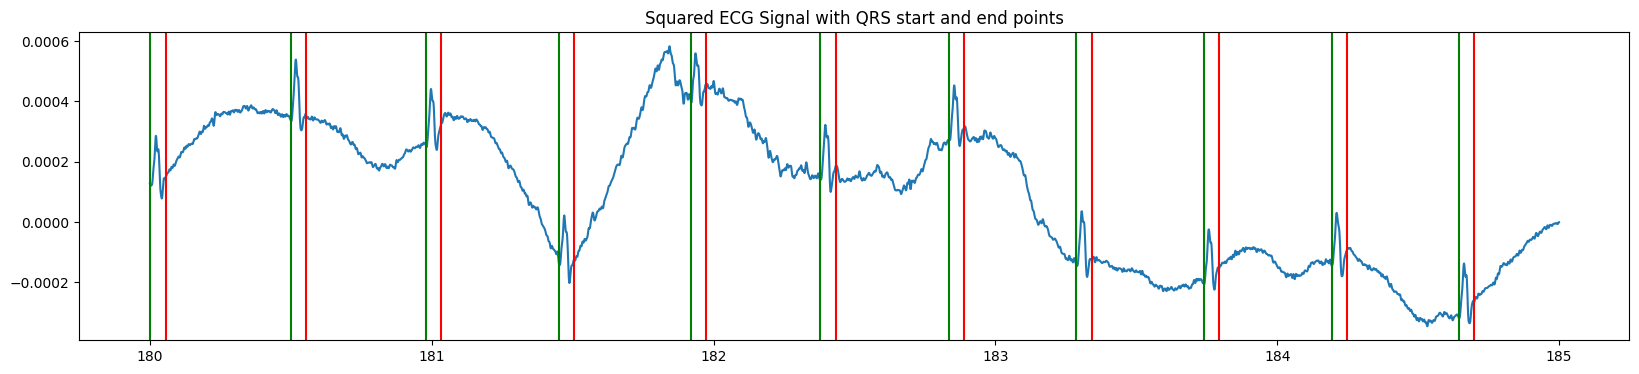

[0.057, 0.054, 0.054, 0.053, 0.053, 0.055, 0.054, 0.055, 0.053, 0.054]


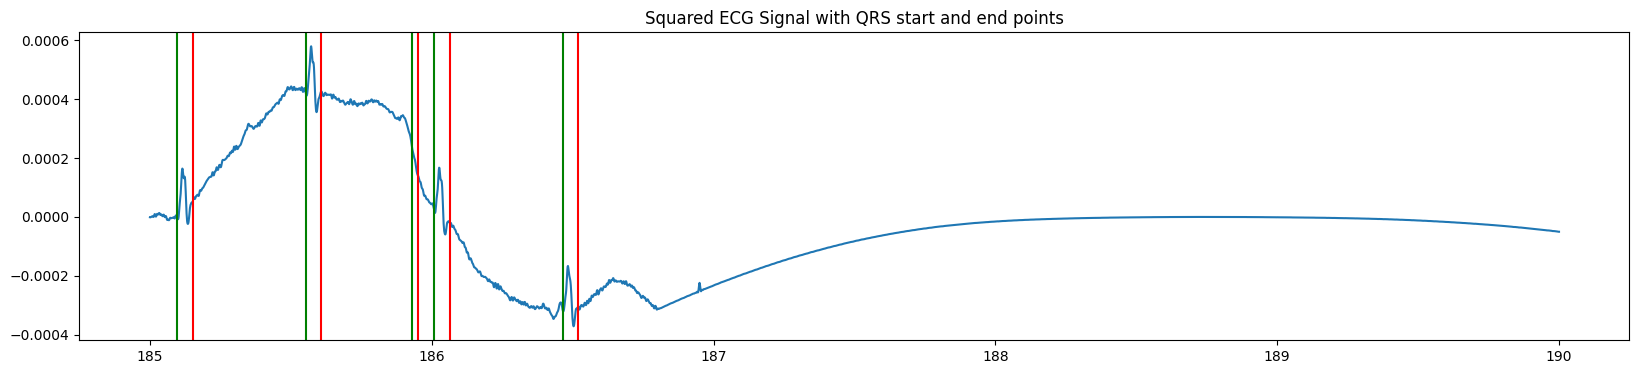

[0.055, 0.054, 0.054]


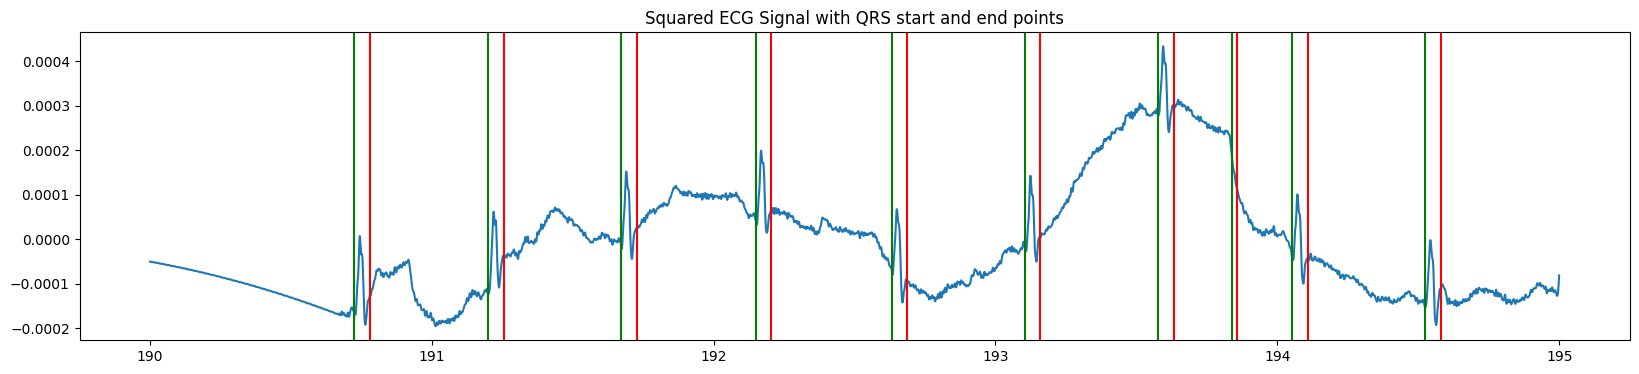

[0.056, 0.055, 0.056, 0.055, 0.055, 0.054, 0.055, 0.056, 0.055]


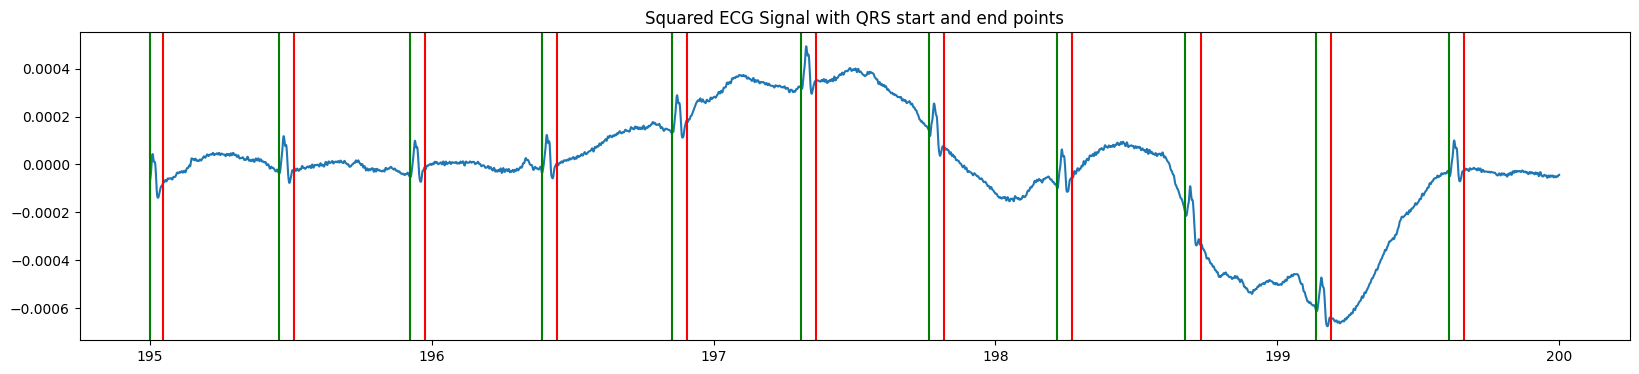

[0.045, 0.055, 0.053, 0.053, 0.054, 0.055, 0.054, 0.055, 0.056, 0.054]


[0.055, 0.054, 0.053, 0.042, 0.054, 0.069]


[]


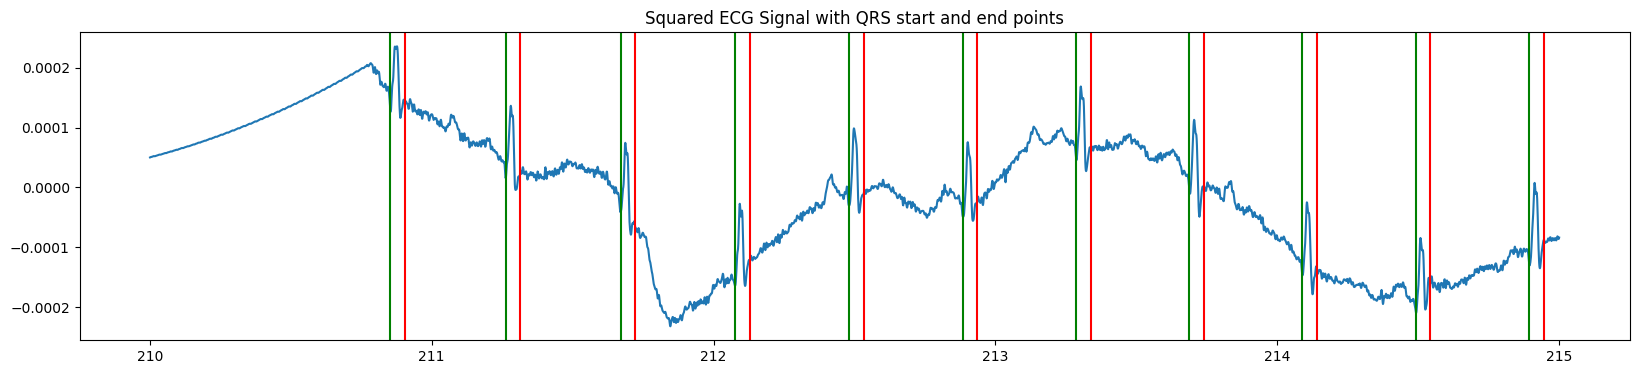

[0.053, 0.051, 0.052, 0.053, 0.053, 0.052, 0.053, 0.054, 0.053, 0.052, 0.054]


[0.046, 0.045, 0.045, 0.033, 0.046, 0.038, 0.044, 0.045, 0.046, 0.046, 0.046, 0.034]


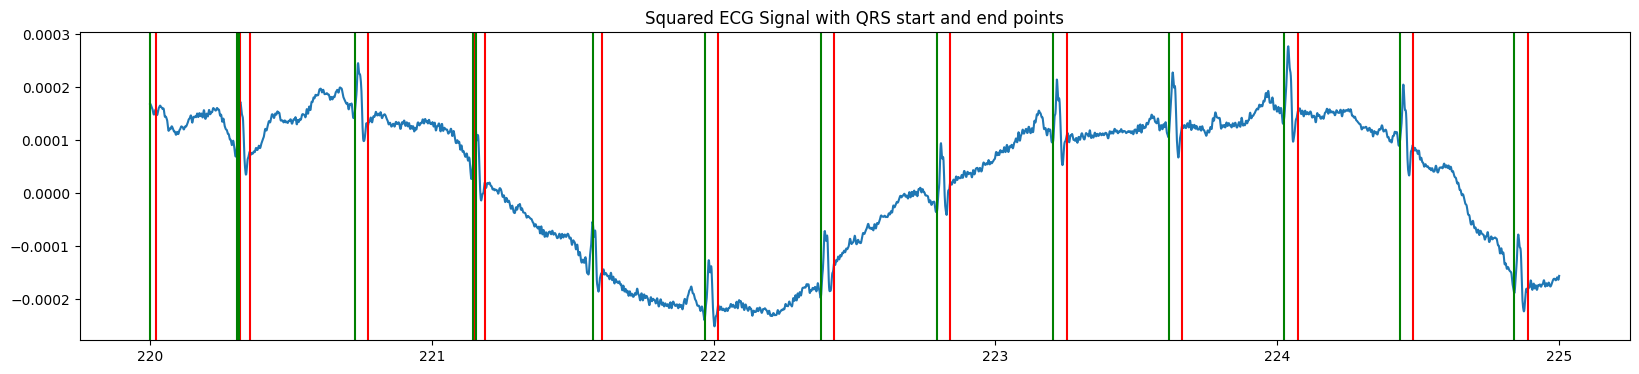

[0.036, 0.045, 0.033, 0.032, 0.045, 0.046, 0.046, 0.047, 0.048, 0.05, 0.047, 0.047]


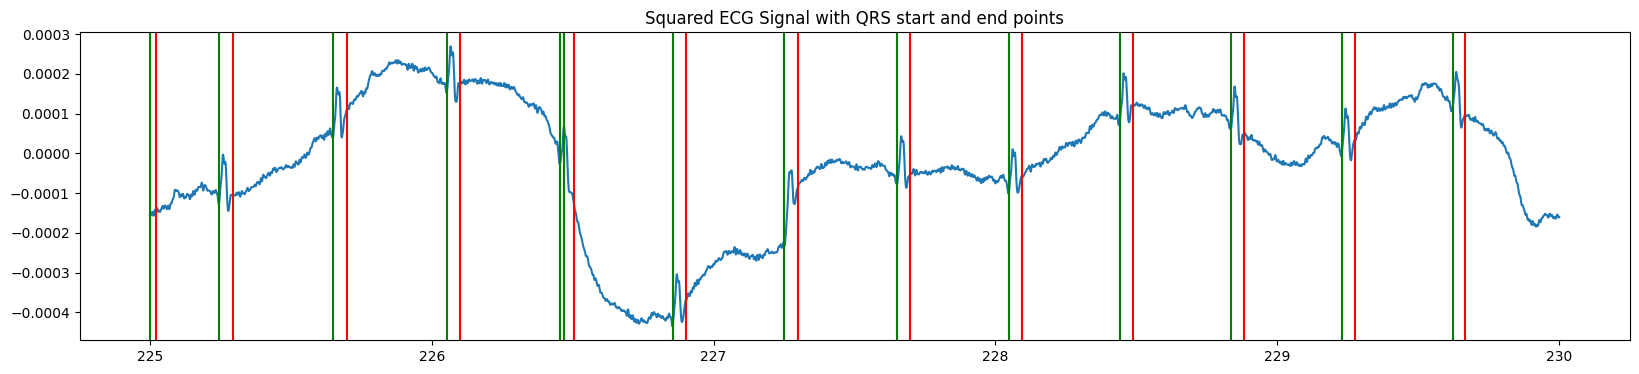

[0.049, 0.048, 0.047, 0.036, 0.047, 0.048, 0.047, 0.045, 0.047, 0.046, 0.047, 0.044]


[0.059, 0.049, 0.047, 0.049, 0.05, 0.049, 0.048, 0.048, 0.048, 0.049, 0.048, 0.047]


[0.053, 0.055, 0.054, 0.055, 0.054, 0.056, 0.055, 0.054, 0.056, 0.053, 0.054, 0.054]


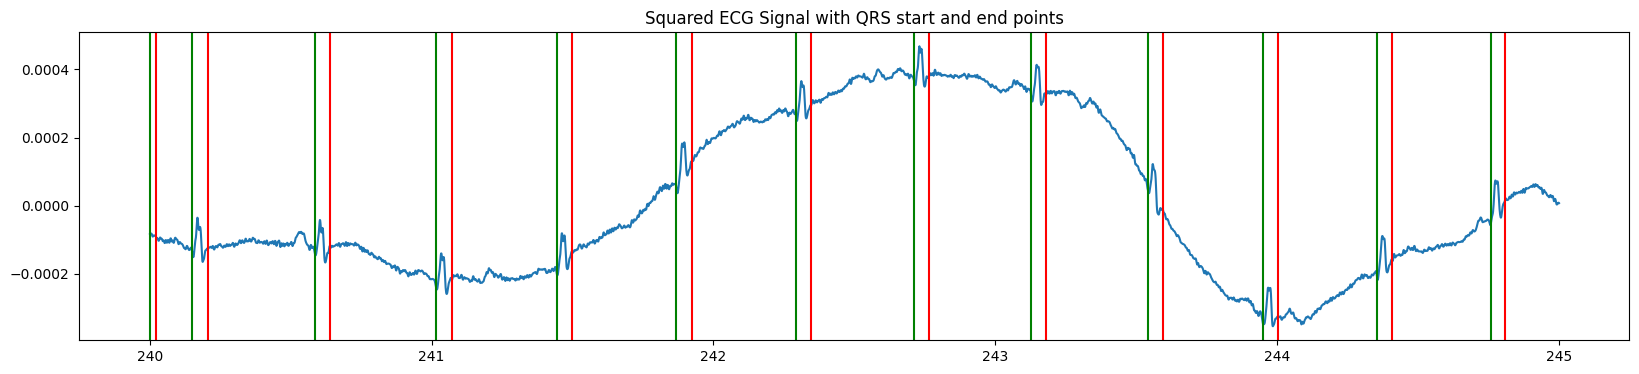

[0.054, 0.053, 0.055, 0.055, 0.055, 0.052, 0.052, 0.053, 0.052, 0.053, 0.052]


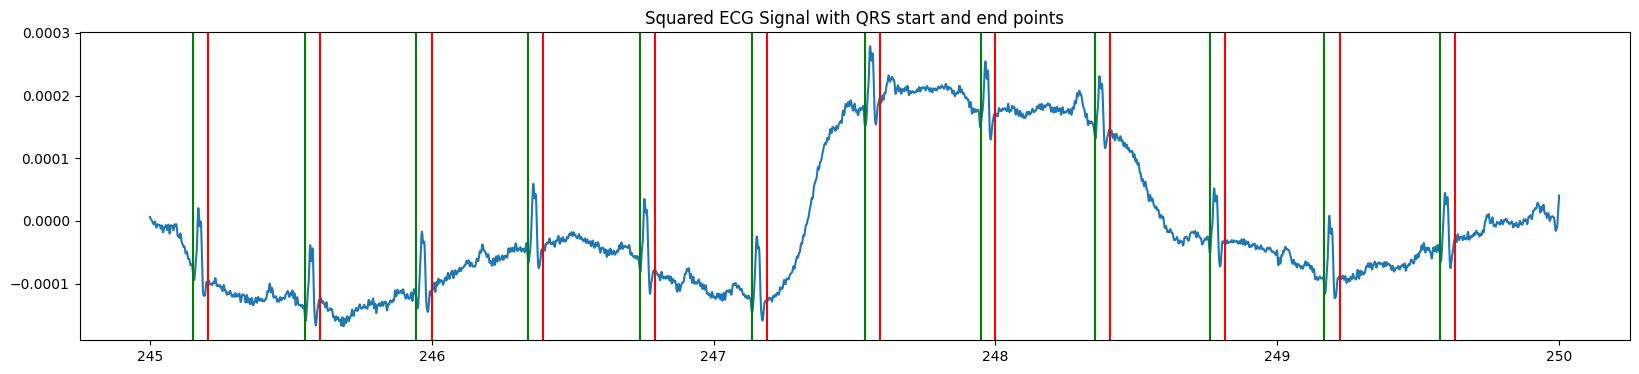

[0.053, 0.054, 0.055, 0.054, 0.053, 0.053, 0.056, 0.052, 0.052, 0.053, 0.054]


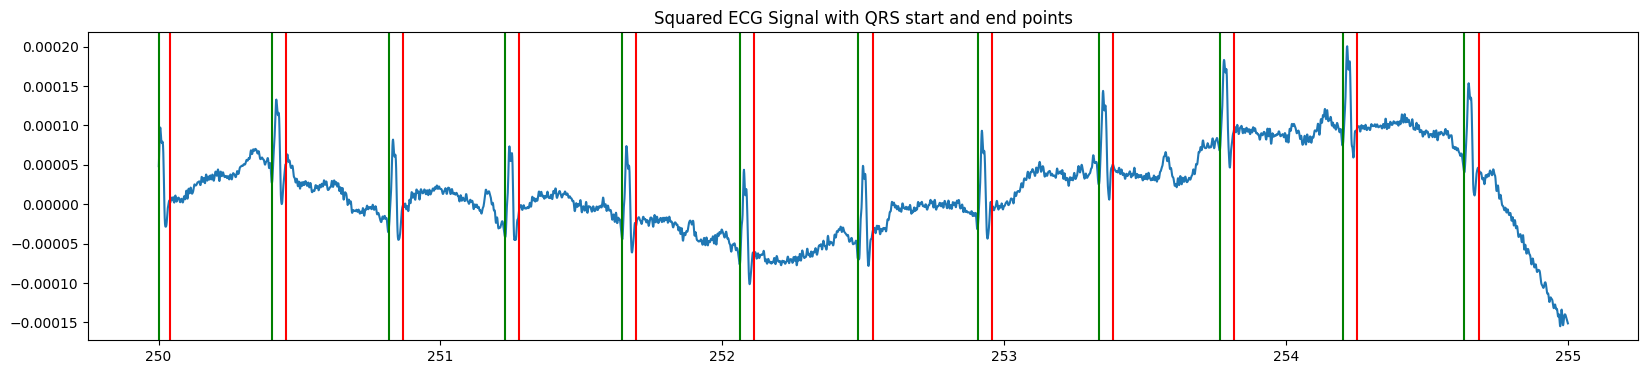

[0.039, 0.05, 0.049, 0.049, 0.05, 0.05, 0.051, 0.05, 0.051, 0.05, 0.05, 0.05]


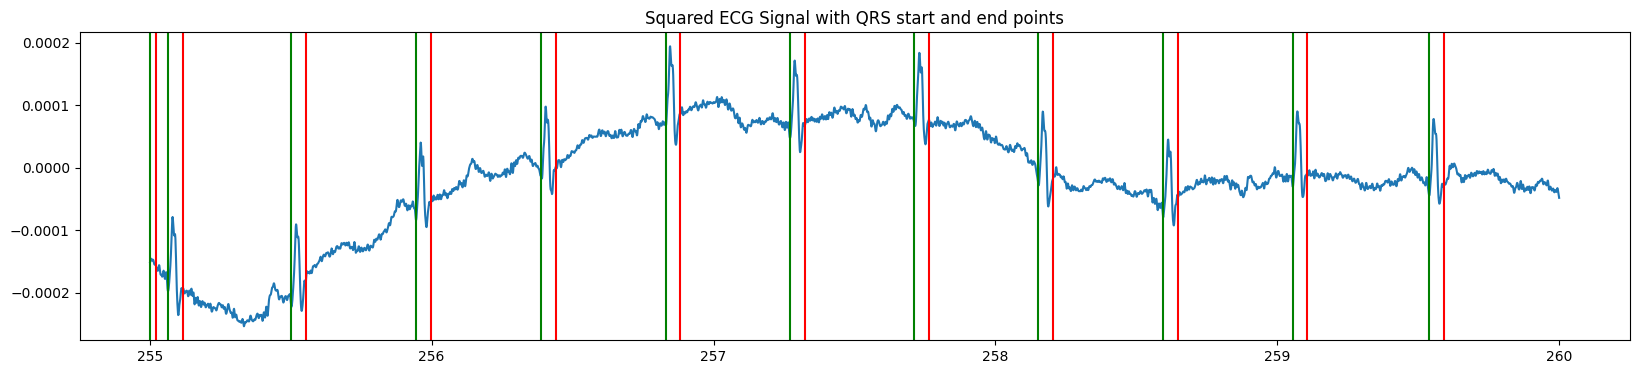

[0.053, 0.053, 0.053, 0.052, 0.052, 0.053, 0.053, 0.053, 0.052, 0.051]


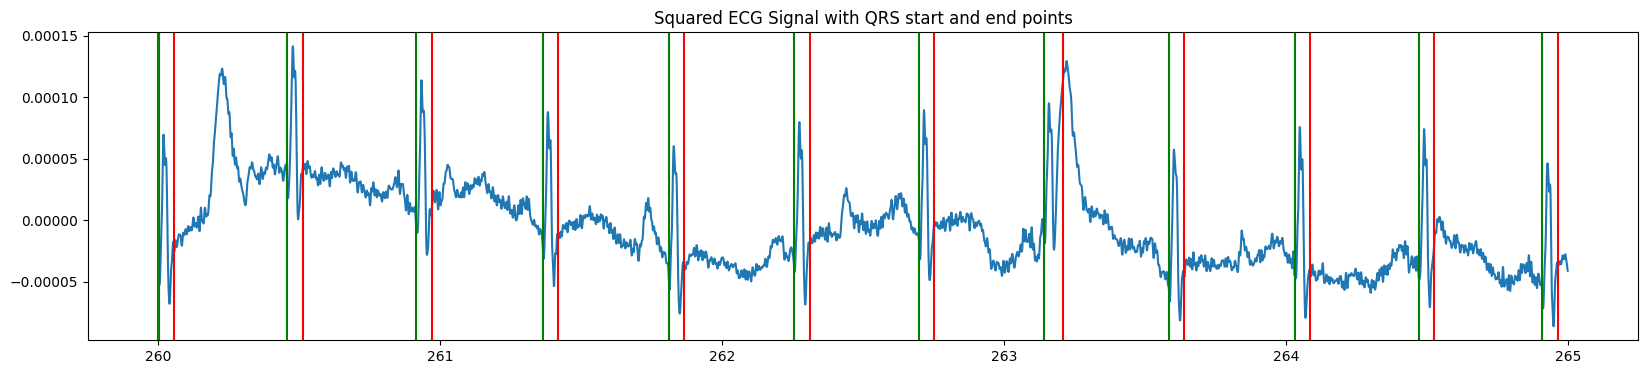

[0.054, 0.055, 0.055, 0.054, 0.054, 0.055, 0.055, 0.069, 0.056, 0.054, 0.054]


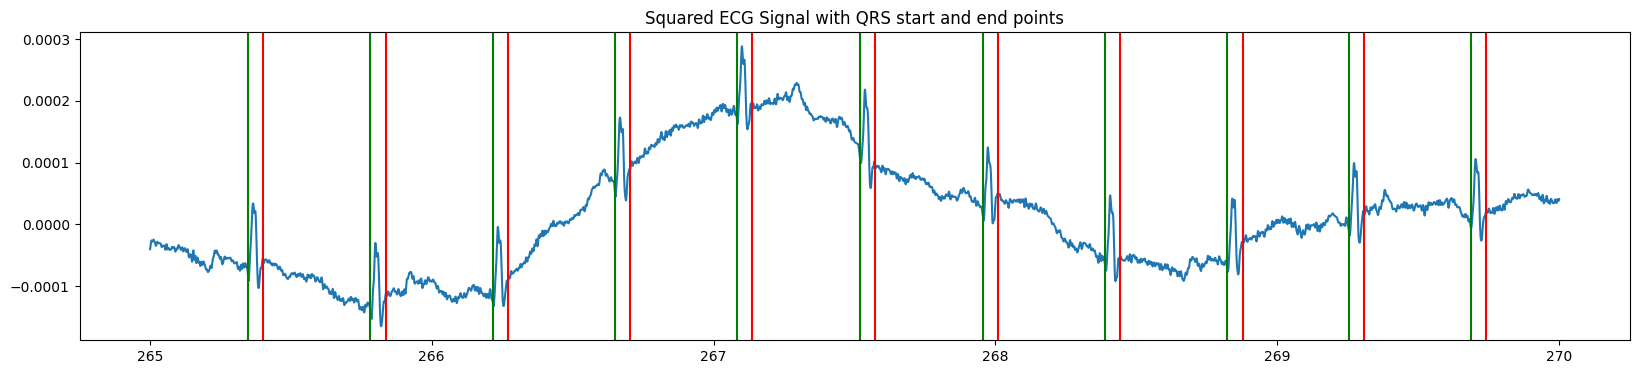

[0.055, 0.054, 0.054, 0.055, 0.054, 0.054, 0.054, 0.053, 0.055, 0.054]


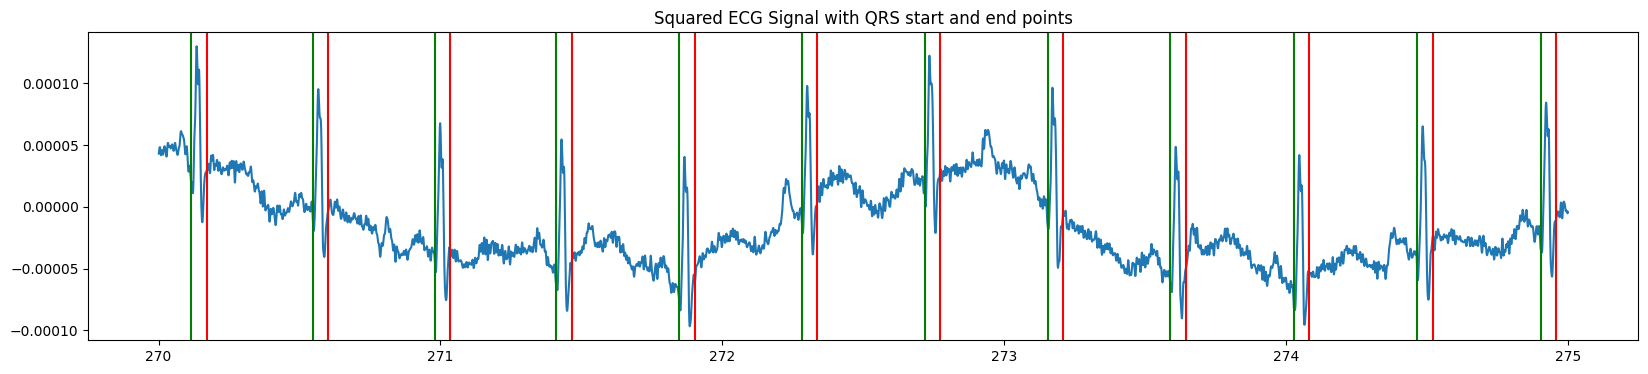

[0.055, 0.055, 0.055, 0.055, 0.054, 0.054, 0.055, 0.054, 0.055, 0.055, 0.055]


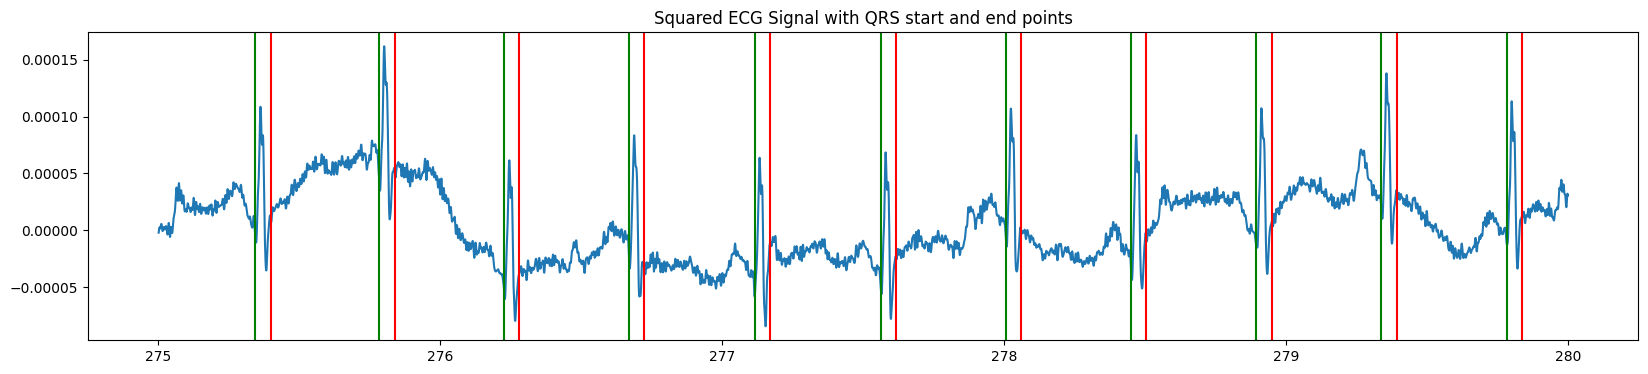

[0.055, 0.055, 0.055, 0.055, 0.056, 0.055, 0.054, 0.055, 0.055, 0.054, 0.054]


[0.056, 0.054, 0.054, 0.055, 0.061, 0.055, 0.054, 0.055, 0.055, 0.055]


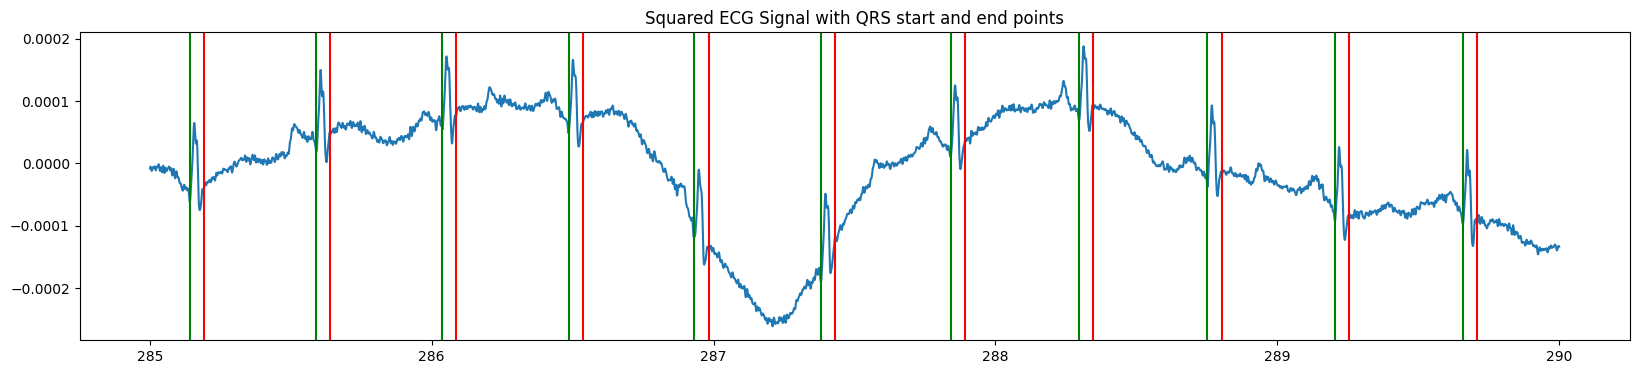

[0.052, 0.052, 0.052, 0.051, 0.051, 0.052, 0.051, 0.05, 0.052, 0.05, 0.051]


[0.053, 0.056, 0.054, 0.055, 0.054, 0.054, 0.054, 0.055, 0.054, 0.054]


[]


In [3]:
win_vector = np.arange(0, 300001, 5000)
period = []
for i in range(len(win_vector) - 1):
    start = 0
    t = np.linspace(start, start + (len(raw_data[0]) * Ts), len(raw_data[0]))
    band_pass_signal = band_pass_filter(
        raw_data[channel][win_vector[i] : win_vector[i + 1]].copy()
    )
    derivative_signal = derivate(band_pass_signal.copy())
    square_signal = square(derivative_signal.copy())
    moving_window_avg_signal = moving_window_integration(square_signal.copy())

    qrs_start, qrs_end = detect_qrs(moving_window_avg_signal, 0.15, 25)
    # Plotting the square signal with QRS start and end points
    plt.figure(figsize=(20, 4))
    plt.plot(
        t[win_vector[i] : win_vector[i + 1]],
        raw_data[channel][win_vector[i] : win_vector[i + 1]],
    )
    plt.title("Squared ECG Signal with QRS start and end points")
    for start, end in zip(qrs_start, qrs_end):
        plt.axvline(x=t[win_vector[i] + start], color="g")
        plt.axvline(x=t[win_vector[i] + end], color="r")
    plt.show()
    win_period = []
    for i in range(len(qrs_start) - 1):
        cal_period = (qrs_end[i] - qrs_start[i]) / Fs
        if cal_period >= 0.03:
            period.append(cal_period)
            win_period.append(cal_period)
    print(win_period)

In [4]:
print(
    f"El total de periodos medidos para el canal {channel} fue de: {len(period)}, y el promedio en general fue de: {np.mean(period):.3g}"
)
print(period)

El total de periodos medidos para el canal 0 fue de: 592, y el promedio en general fue de: 0.0524
[0.055, 0.054, 0.055, 0.054, 0.054, 0.054, 0.053, 0.054, 0.054, 0.055, 0.049, 0.05, 0.048, 0.048, 0.049, 0.049, 0.049, 0.051, 0.049, 0.047, 0.051, 0.053, 0.054, 0.052, 0.052, 0.052, 0.053, 0.051, 0.052, 0.053, 0.052, 0.047, 0.049, 0.044, 0.046, 0.046, 0.046, 0.031, 0.044, 0.046, 0.033, 0.034, 0.05, 0.049, 0.05, 0.048, 0.051, 0.048, 0.049, 0.05, 0.047, 0.049, 0.055, 0.055, 0.054, 0.054, 0.055, 0.054, 0.054, 0.055, 0.055, 0.056, 0.053, 0.055, 0.053, 0.056, 0.055, 0.055, 0.053, 0.054, 0.055, 0.055, 0.055, 0.055, 0.055, 0.055, 0.056, 0.055, 0.055, 0.055, 0.055, 0.054, 0.053, 0.056, 0.057, 0.056, 0.057, 0.055, 0.056, 0.055, 0.055, 0.054, 0.056, 0.055, 0.054, 0.054, 0.054, 0.055, 0.056, 0.056, 0.054, 0.054, 0.054, 0.054, 0.054, 0.053, 0.054, 0.055, 0.054, 0.055, 0.054, 0.054, 0.055, 0.054, 0.054, 0.054, 0.054, 0.054, 0.054, 0.054, 0.055, 0.055, 0.054, 0.055, 0.055, 0.055, 0.054, 0.055, 0.054, 0.

#### Conclusión
El algoritmo de Pan-Tompkins, implementado en el código proporcionado, es esencial en el campo de la medicina y la investigación cardiológica debido a su eficacia en la detección automática del complejo QRS en señales de electrocardiograma (ECG). Este complejo es crucial para la evaluación del ritmo cardíaco y la detección de diversas anomalías cardíacas, como arritmias. La capacidad de detectar de forma precisa y eficiente estos complejos es vital para el diagnóstico precoz y la prevención de condiciones cardíacas potencialmente graves.

La implementación específica del código realiza varias operaciones clave de procesamiento de señales:

1. **Filtrado de Banda Pasante:** Reduce el ruido y las frecuencias irrelevantes, centrándose en la banda de interés que contiene los complejos QRS, mejorando así la claridad de las señales para las etapas de procesamiento subsiguientes.

2. **Derivación y Cuadratura:** Estos pasos aumentan la prominencia de las características abruptas de la señal, como los picos del QRS, facilitando su identificación y diferenciación de otros componentes de la señal.

3. **Integración con Ventana Móvil:** Proporciona una señal más uniforme que simplifica la detección de los picos del QRS, asegurando que el sistema identifique correctamente el inicio y el fin de cada complejo QRS.

La metodología implementada es un claro ejemplo de cómo las técnicas de procesamiento de señales pueden ser aplicadas de manera efectiva en contextos de salud para mejorar los diagnósticos y tratamientos. Este enfoque no solo permite una detección precisa en tiempo real sino que también facilita la labor de los médicos al proporcionar datos claros y bien definidos para análisis posteriores.

La implementación de este código refleja la importancia del algoritmo de Pan-Tompkins en el monitoreo y análisis cardíaco. Al proveer una herramienta automática y eficiente para la detección de complejos QRS, se amplía la capacidad de realizar diagnósticos cardíacos rápidos y precisos, lo que es esencial para el tratamiento oportuno y la gestión de la salud del corazón en diversos entornos médicos.

In [5]:
!jupyter nbconvert --to latex "./lab4.ipynb"

[NbConvertApp] Converting notebook ./lab4.ipynb to latex
/home/xmunder/universidad/DSP/.venv/lib/python3.10/site-packages/nbconvert/utils/pandoc.py:51: RuntimeWarning: You are using an unsupported version of pandoc (2.9.2.1).
Your version must be at least (2.14.2) but less than (4.0.0).
Refer to https://pandoc.org/installing.html.
Continuing with doubts...
  check_pandoc_version()
[NbConvertApp] Support files will be in lab4_files/
[NbConvertApp] Writing 65181 bytes to lab4.tex
